In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
leads = pd.read_csv('Leads.csv')

In [3]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

## Basic Analysis

In [4]:
leads.shape

(9240, 37)

#### There are total of 9240 rows of data with 37 columns

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

#### With all the statistics from the numeric columns we see quite a lot variance as well as null values

## Data Cleaning

#### There are various types of data types and all seems to be in correct format. But looks like there are some null values as well based on the total data count as 9240

Let's calculate the percentage of null values in the dataset

In [7]:
def calculate_null_percentage(dataset):
    return round(dataset.isnull().sum() / len(dataset) * 100, 2)

In [8]:
calculate_null_percentage(leads)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Also as mentioned in the problem statement, "Select" is considered to be as `null`. This is because if the data was collected from an user interface, there could have been several options as A, B, C and 'Select'. If the data entry operator or user did not choose any of the valid options it would remain as 'Select'. This implies that "Select" is same as `null` in the dataset.

Let's replace `Select` with null and re-calculate the `null` values percentage.

In [9]:
leads = leads.replace('Select', np.nan)

In [10]:
calculate_null_percentage(leads)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### There is a significant increse from `29.32%` to `74.19%` in the `Lead Profile` column after replacing all the `Select` values.

According to general guideline all columns which has more than **`40%`** of missing values should be dropped as they won't impact on the analysis any significantly.
Let's see what does these columns contain in actual.

In [11]:
columns_with_high_missing_values = ["How did you hear about X Education", 
                                    "Lead Quality", 
                                    "Lead Profile", 
                                    "Asymmetrique Activity Index", 
                                    "Asymmetrique Profile Index", 
                                    "Asymmetrique Activity Score", 
                                    "Asymmetrique Profile Score"]

In [12]:
leads[columns_with_high_missing_values]

How did you hear about X Education       Lead Quality    Lead Profile  \
0                                   NaN   Low in Relevance             NaN   
1                                   NaN                NaN             NaN   
2                                   NaN           Might be  Potential Lead   
3                         Word Of Mouth           Not Sure             NaN   
4                                 Other           Might be             NaN   
...                                 ...                ...             ...   
9235                                NaN  High in Relevance  Potential Lead   
9236                                NaN           Might be  Potential Lead   
9237                                NaN           Not Sure  Potential Lead   
9238                      Online Search                NaN             NaN   
9239                                NaN           Might be  Potential Lead   

     Asymmetrique Activity Index Asymmetrique Profile Index  \
0                      02.Medium                  02.Medium   
1                      02.Medium                  02.Medium   
2                      02.Medium                    01.High   
3                      02.Medium                    01.High   
4                      02.Medium                    01.High   
...                          ...                        ...   
9235                   02.Medium                    01.High   
9236                   02.Medium                    01.High   
9237                   02.Medium                    01.High   
9238                   02.Medium                  02.Medium   
9239                   02.Medium                    01.High   

      Asymmetrique Activity Score  Asymmetrique Profile Score  
0                            15.0                        15.0  
1                            15.0                        15.0  
2                            14.0                        20.0  
3                            13.0                        17.0  
4                            15.0                        18.0  
...                           ...                         ...  
9235                         15.0                        17.0  
9236                         14.0                        19.0  
9237                         13.0                        20.0  
9238                         15.0                        16.0  
9239                         15.0                        18.0  

[9240 rows x 7 columns]

#### Although these columns seems to have an impact on the case study as they have some kind of score, but due to high percentage of missing values, these columns need to be dropped from the dataset

In [13]:
leads = leads.drop(columns = columns_with_high_missing_values)

In [14]:
leads.shape

(9240, 30)

In [15]:
calculate_null_percentage(leads)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Specialization, Tags and City has close to `40%` missing values but we should not drop them as they might have impact on the overall analysis

In [16]:
leads.Specialization.value_counts() / len(leads) * 100

Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

#### Let's fill the null values with a columns called `Other`

In [17]:
leads.Specialization = leads.Specialization.fillna('Other')

#### Recalculating the Specialization values

In [18]:
leads.Specialization.value_counts() / len(leads) * 100

Other                                36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

#### Let's apply the same for Tags columns

In [19]:
leads.Tags.value_counts() / len(leads) * 100

Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0.357143
number not provided                                   0

Tags column has most values as "Will revert after reading the email" i.e. **58.7%**. So, all the missing columns can be filled with the same value.

In [20]:
leads.Tags = leads.Tags.fillna('Will revert after reading the email')

In [21]:
leads.Tags.value_counts() / len(leads) * 100

Will revert after reading the email                  58.712121
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0.357143
number not provided                                   0

#### Let's look into the City columns

In [22]:
leads.City.value_counts() / len(leads) * 100

Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

#### As we do not have enough information on the City we can fill the missing City information as **Mumbai** (Which is already present in the dataset) and has the majority in count. We could have filled with "Other Cities" as well here.

In [23]:
leads.City = leads.City.fillna('Mumbai')

In [24]:
calculate_null_percentage(leads)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Country column has **`26.63%`** missing values.

In [25]:
leads.Country.value_counts() / len(leads) * 100

India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switzerland   

Most mentioned country is India. Missing values could be filled with India. 

In [26]:
leads.Country = leads.Country.fillna('India')

In [27]:
leads.Country.value_counts() / len(leads) * 100

India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switzerland   

#### "What is your current occupation" column has some missing values. Let's impute this.

In [28]:
leads['What is your current occupation'].value_counts() / len(leads) * 100

Unemployed              60.606061
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

Majority of the leads are unemployed here. It might be not appropriate to fill the missing data with `Unemployed`. It could be filled with `Other` as well. Business domain-wise and Unemployed person would(propably) tend to choose a course for employment. So all the missing values could be better filled with `Unemployed` column.

In [29]:
leads['What is your current occupation'] = leads['What is your current occupation'].fillna('Unemployed')

In [30]:
leads['What is your current occupation'].value_counts() / len(leads) * 100

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

#### "What matters most to you in choosing a course" column has good number of missing values. Let's impute that too

In [31]:
leads['What matters most to you in choosing a course'].value_counts() / len(leads) * 100

Better Career Prospects      70.649351
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

Very simple choice here to fill the missing values with "Better Career Prospects".

In [32]:
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].fillna('Better Career Prospects')

In [33]:
leads['What matters most to you in choosing a course'].value_counts() / len(leads) * 100

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [34]:
calculate_null_percentage(leads)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

#### Rest of the missing values columns are less then `1.5%`. These rows will be dropped.

In [35]:
leads.dropna(inplace=True)

In [36]:
calculate_null_percentage(leads)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

#### As we see there are no more null values in the dataset. We can proceed for data analysis for better understanding of the dataset and features.

## Exploratory Data Analysis

#### Let's find out the conversion rate as convert is the target variable.

In [37]:
sum(leads.Converted) / len(leads) * 100

37.85541106458012

#### So, the conversion rate is very close to `38%`

Let's find out relation among leads origin and lead source with the conversions.

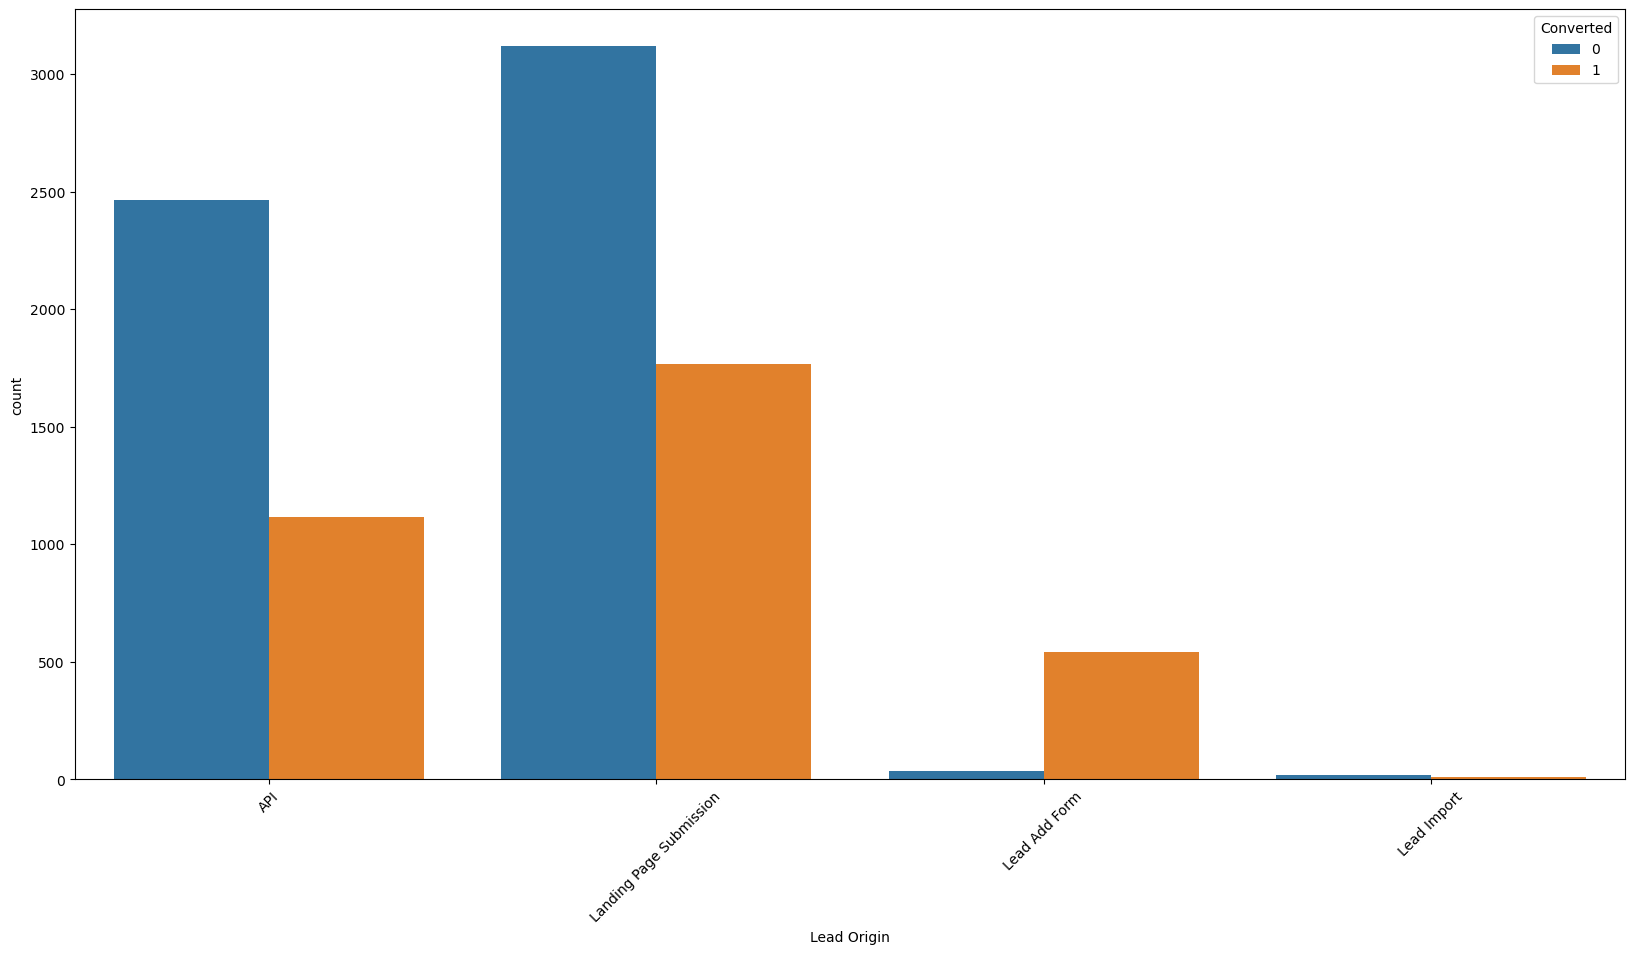

In [38]:
plt.figure(figsize=(20, 10))
sns.countplot(data = leads, x = 'Lead Origin', hue = 'Converted')
plt.xticks(rotation = 45)
plt.show()

#### Observations
1. API and Landing Page Submission have more conversion rate
2. Lead Add Form has the highest coversion rate compared to the other two
3. Lead Import has a very minimal conversion rate

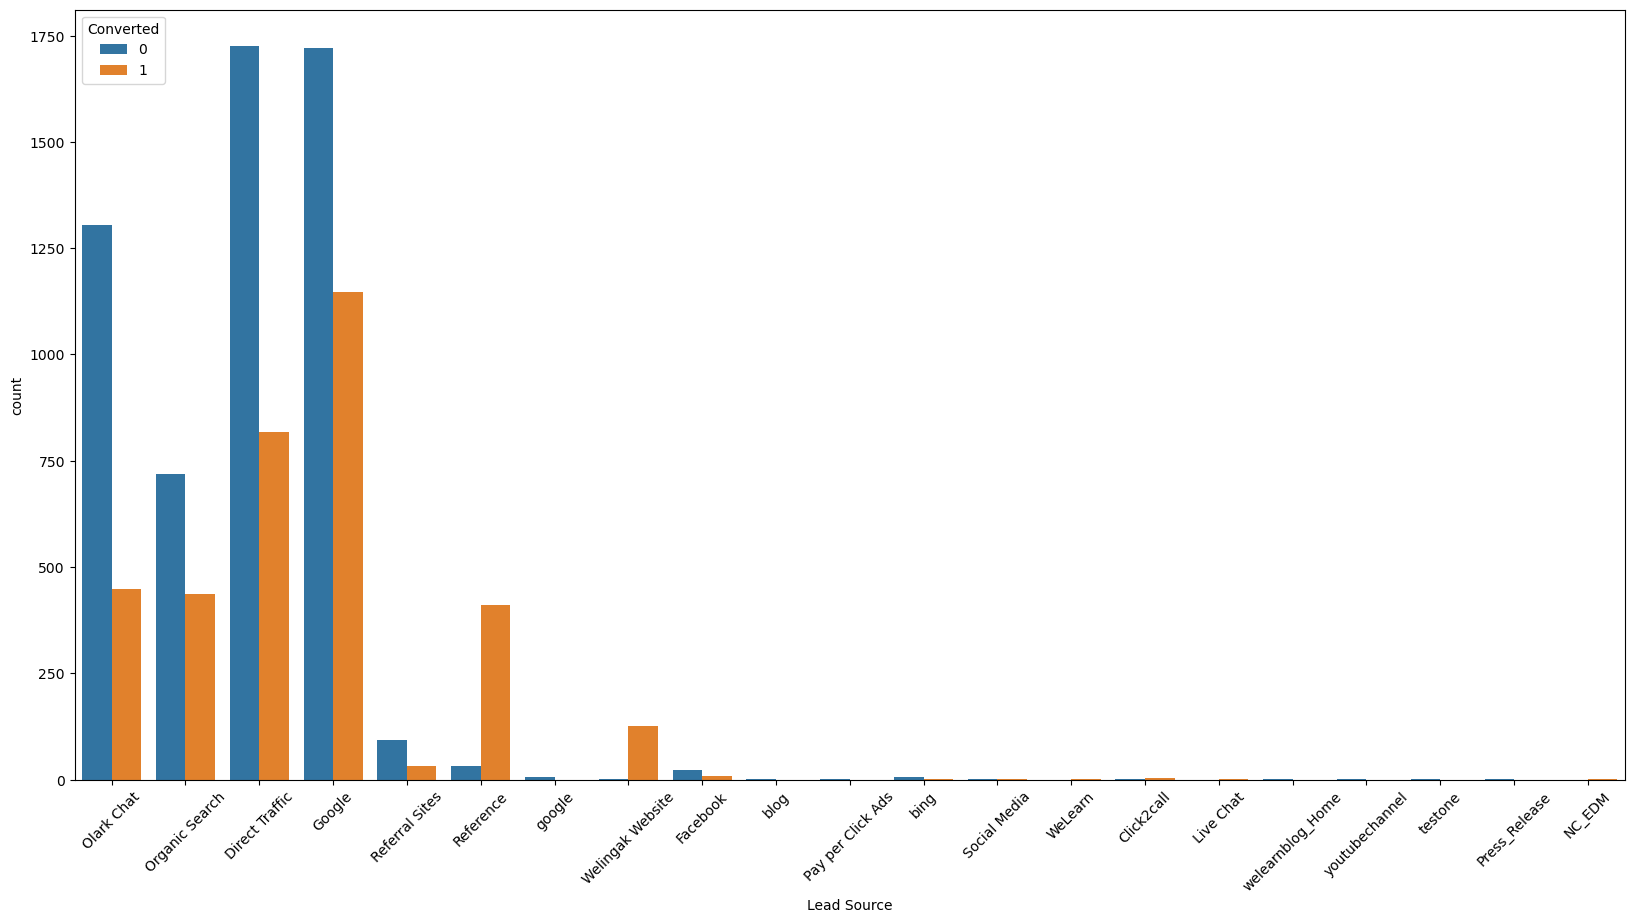

In [39]:
plt.figure(figsize=(20, 10))
sns.countplot(data = leads, x = 'Lead Source', hue = 'Converted')
plt.xticks(rotation = 45)
plt.show()

#### Observations
1. Olark Chat, Organic Search Direct Traffic, Google and Reference have more conversion rate
2. There are Google and google both - we need to convert them to single category
3. Also there are many **other** categories with minimal reach and conversions - we can convert them to a other category here

In [40]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [41]:
# Replacing google with Google
leads['Lead Source'].replace("google", "Google", inplace = True)

In [42]:
# Replacing Click2call, Press_Release, Social Media, 
# Live Chat, youtubechannel, testone, Pay per Click Ads, 
# welearnblog_Home, WeLearn, blog, NC_EDM
# to 'Others'

leads['Lead Source'].replace(['Click2call', 'Press_Release', 'Social Media', 'Live Chat', 
              'youtubechannel', 'testone', 'Pay per Click Ads', 'welearnblog_Home', 
              'WeLearn', 'blog', 'NC_EDM'], "Others", inplace = True)

In [43]:
leads['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                17
bing                   6
Name: Lead Source, dtype: int64

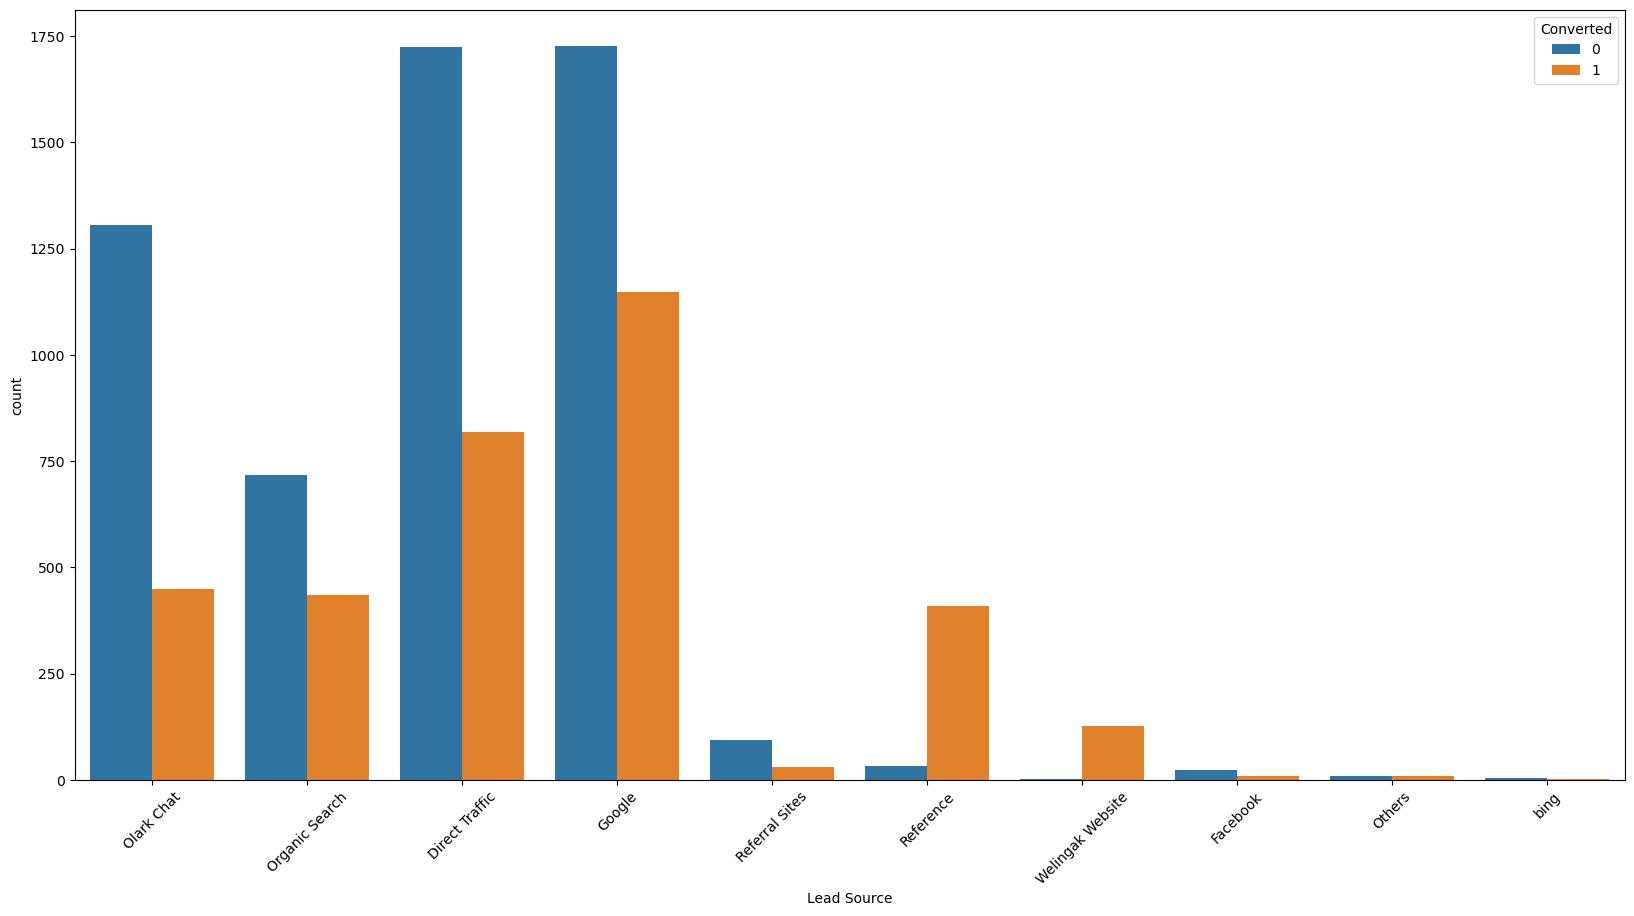

In [44]:
plt.figure(figsize=(20, 10))
sns.countplot(data = leads, x = 'Lead Source', hue = 'Converted')
plt.xticks(rotation = 45)
plt.show()

#### Observations -
1. Google and Direct Traffic conversion rates are high in numbers
2. Reference and Welingak website has the highest conversion rate in terms of percentage

More focus should be on Google traffic, reference and Welingak website, nurturing these sources might increase conversion rate by a good margin

Let's see 'Do Not Email' and 'Do Not Call' columns based on the conversion rate

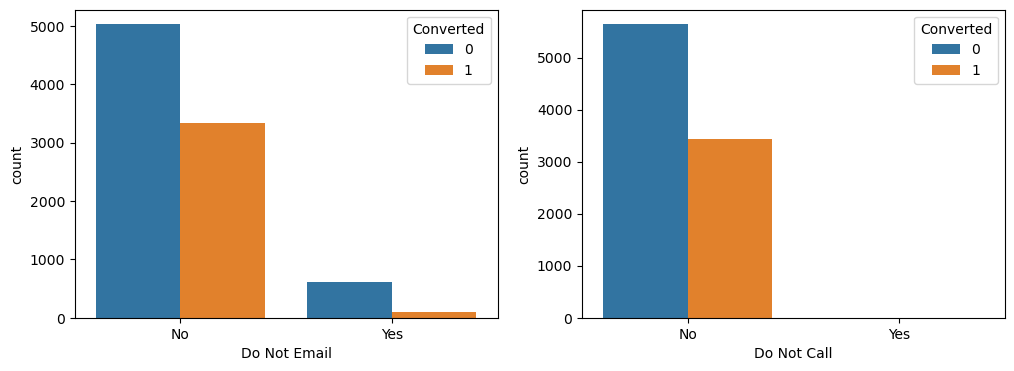

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data = leads, x = 'Do Not Email', hue = 'Converted', ax=axs[0])
sns.countplot(data = leads, x = 'Do Not Call', hue = 'Converted', ax=axs[1])
plt.show()

#### Observations -
1. Condidates who allowed emails and calls communication has more convertion rate.
2. In case of 'Do Not Email' and 'Do Not Call' - 'NO' - conversion rates are similar
3. It can be inferred that interested candidates allowed calls and emails

Let's analyse 'TotalVisits'

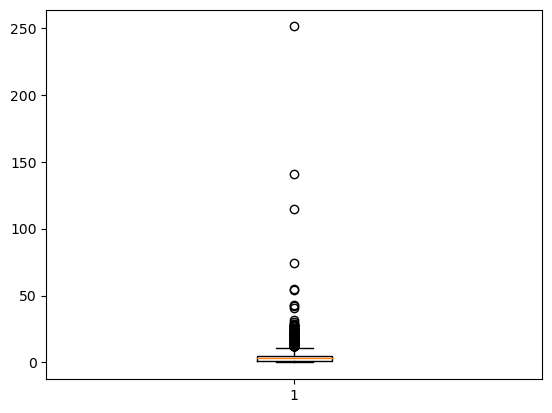

In [46]:
plt.boxplot(data=leads, x='TotalVisits')
plt.show()

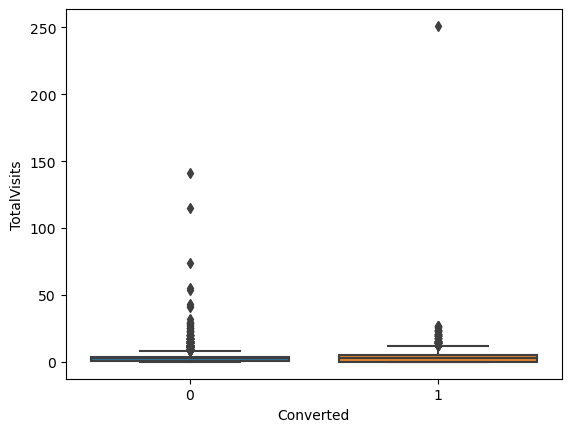

In [47]:
sns.boxplot(data=leads, x="Converted", y='TotalVisits')
plt.show()

As we see there are many outliers in the totalvisits column based on the target columns. Let's consider 99th percentile to see if the outliers are removed. We will be updating the values to 99th percentile values here.

In [48]:
quantile = leads.TotalVisits.quantile([0.05, 0.99]).values
leads.TotalVisits[leads.TotalVisits <= quantile[0]] = quantile[0]
leads.TotalVisits[leads.TotalVisits >= quantile[1]] = quantile[1]

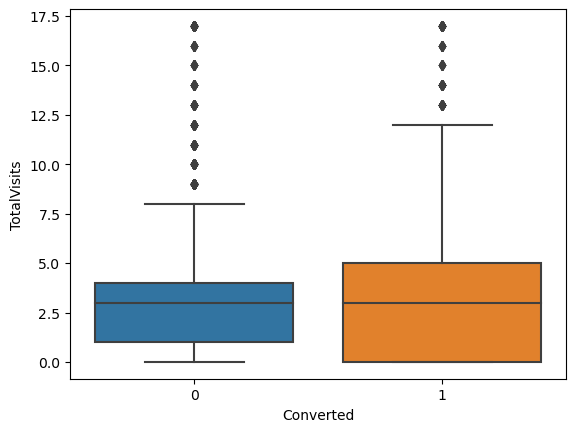

In [49]:
sns.boxplot(data=leads, x="Converted", y='TotalVisits')
plt.show()

We can still see a good amount of outliers, it's will be better to take 95th percentile.

In [50]:
quantile = leads.TotalVisits.quantile([0.05, 0.95]).values
leads.TotalVisits[leads.TotalVisits <= quantile[0]] = quantile[0]
leads.TotalVisits[leads.TotalVisits >= quantile[1]] = quantile[1]

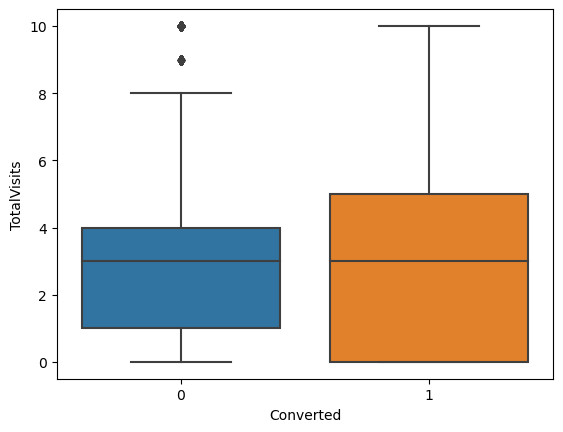

In [51]:
sns.boxplot(data=leads, x="Converted", y='TotalVisits')
plt.show()

#### Observations -
1. There were good amount of outliers, any of the 99th or 95th percentiles data could be taken for further analysis. 
2. Mean of both the converted and non-converted are quite same.

Let's check "Total Time Spent on Website" column in case of any outliers

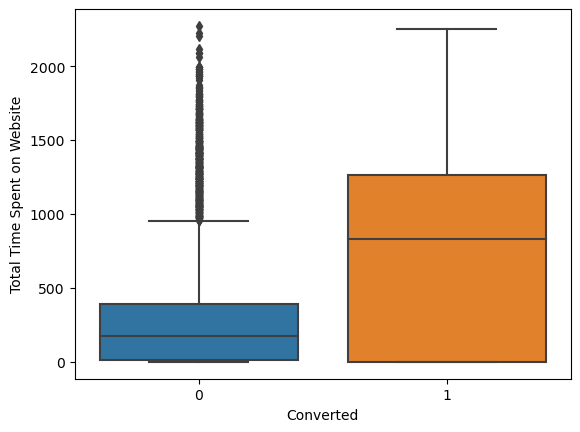

In [52]:
sns.boxplot(data=leads, x="Converted", y='Total Time Spent on Website')
plt.show()

#### Observations -
1. There are good amount of outliers for non-converted leads
2. Also, leads who are spending more time got converted, so wesite of could be more engaging to attract more leads and eventually more conversions

Let's look at the "Page Views Per Visit" attribute

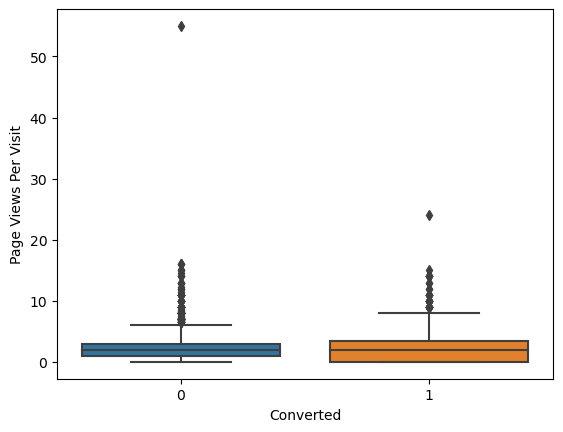

In [53]:
sns.boxplot(data=leads, x="Converted", y='Page Views Per Visit')
plt.show()

There are outliers, we will apply 95th percentile for this as well

In [54]:
quantile = leads['Page Views Per Visit'].quantile([0.05, 0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= quantile[0]] = quantile[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= quantile[1]] = quantile[1]

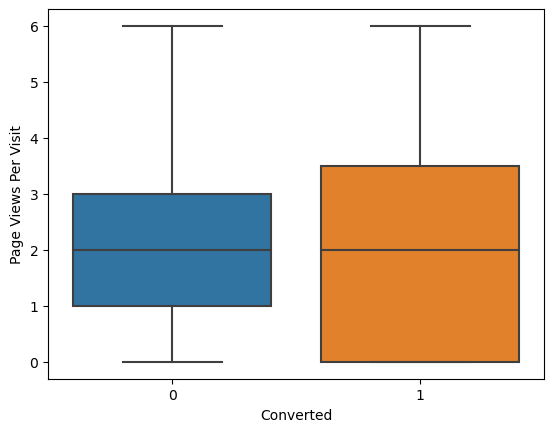

In [55]:
sns.boxplot(data=leads, x="Converted", y='Page Views Per Visit')
plt.show()

#### Observations -
1. Converted and non-converted leads have quite similar mean
2. We cannot infer here that converted leads have visited more pages in compare to non-converted ones

Let's analyse 'Last Activity' column

In [56]:
leads['Last Activity']

0       Page Visited on Website
1                  Email Opened
2                  Email Opened
3                   Unreachable
4             Converted to Lead
                 ...           
9235          Email Marked Spam
9236                   SMS Sent
9237                   SMS Sent
9238                   SMS Sent
9239                   SMS Sent
Name: Last Activity, Length: 9074, dtype: object

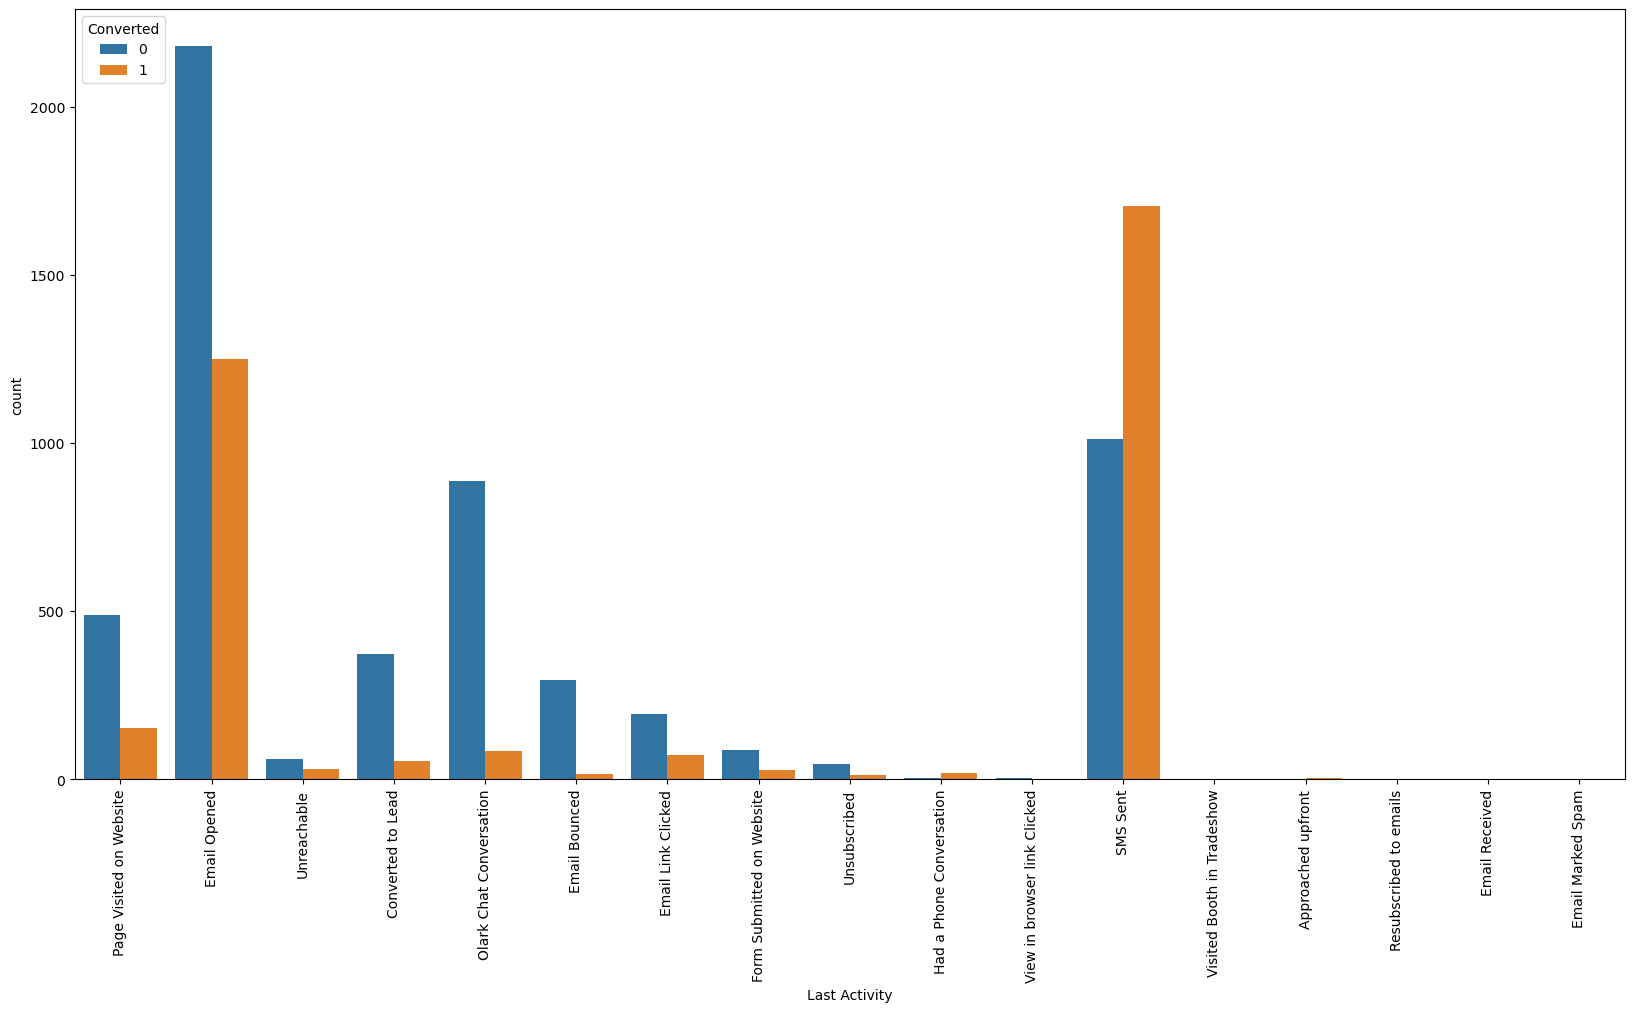

In [57]:
plt.figure(figsize=(20, 10))
sns.countplot(data = leads, x = 'Last Activity', hue = 'Converted')
plt.xticks(rotation = 90)
plt.show()

#### Observations - 
1. 'SMS Sent' and 'Email Opened' has more conversions than any other
2. 'SMS Sent' has the higher conversion rate
3. We can group the other minor 'Last Activity' attributes to 'Other'

In [58]:
leads['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [59]:
leads['Last Activity'].replace(['Resubscribed to emails', 'Visited Booth in Tradeshow', 'Email Marked Spam', 
                                'Email Received', 'Approached upfront', 'View in browser link Clicked', 
                                'Had a Phone Conversation',], "Other", inplace = True)

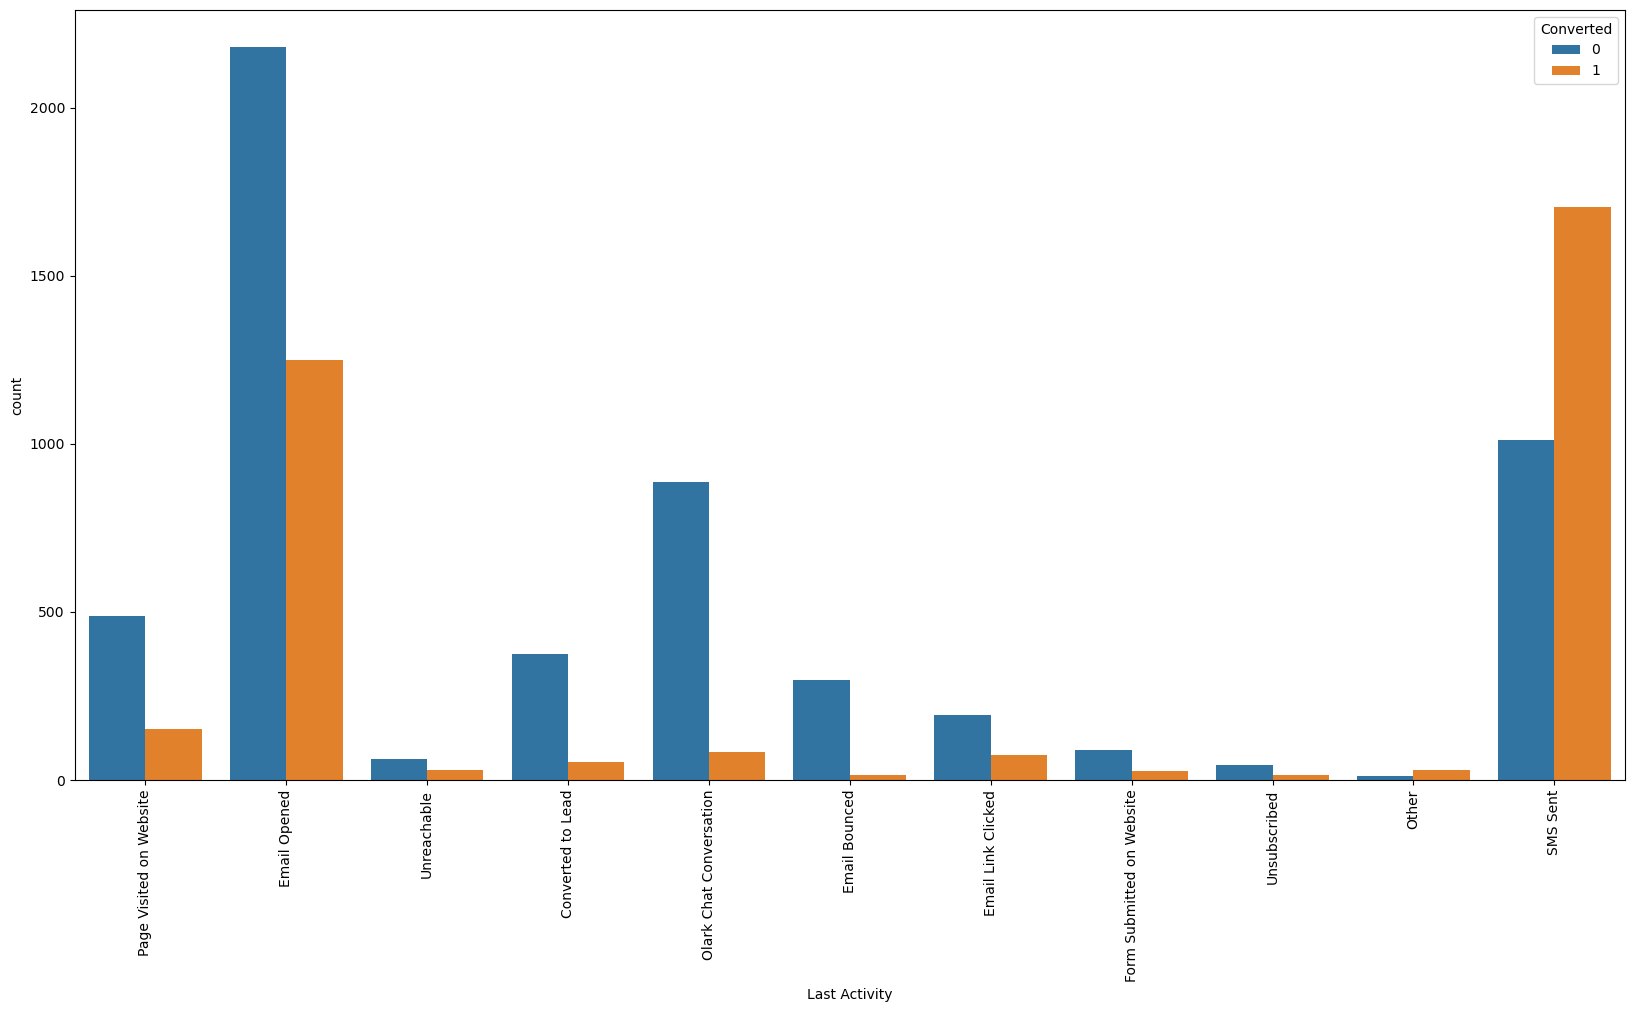

In [60]:
plt.figure(figsize=(20, 10))
sns.countplot(data = leads, x = 'Last Activity', hue = 'Converted')
plt.xticks(rotation = 90)
plt.show()

#### Observations - 
1. Nothing major changes from the previous observations

Let's check conversions based on Country

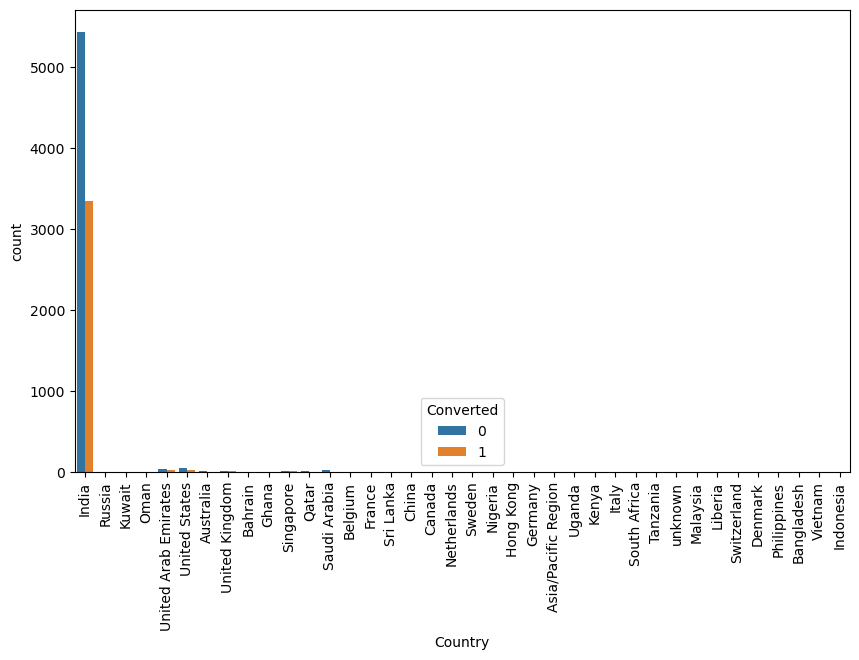

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(data = leads, x = 'Country', hue = 'Converted')
plt.xticks(rotation = 90)
plt.show()

#### Observations -
Majority of the leads are from India and conversions too

Let's check conversions with specialization

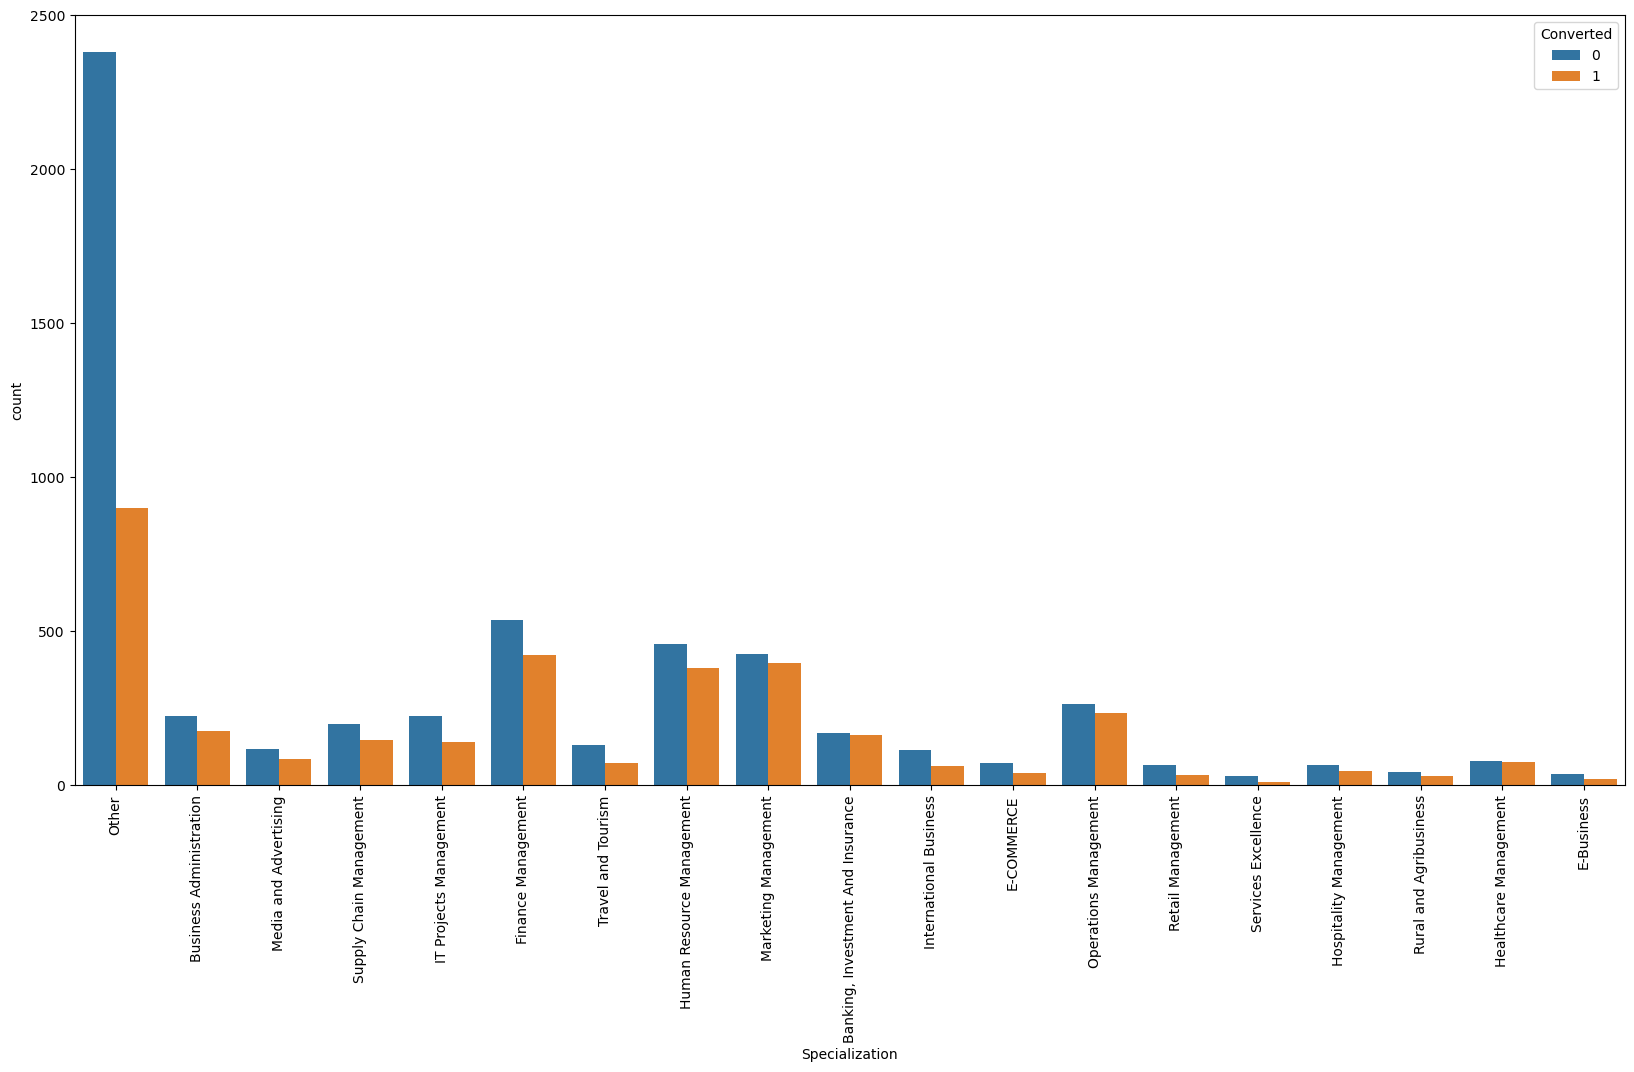

In [62]:
plt.figure(figsize=(20, 10))
sns.countplot(data = leads, x = 'Specialization', hue = 'Converted')
plt.xticks(rotation = 90)
plt.show()

#### Observations -
1. There are more conversions from Other category, this implies that leads who did not mention their specialization have got more conversions than other specializations
2. Among all the mentioned specializations Marketing Management, Human Resource Management, Finance Management has very good conversion rate as we all numbers.

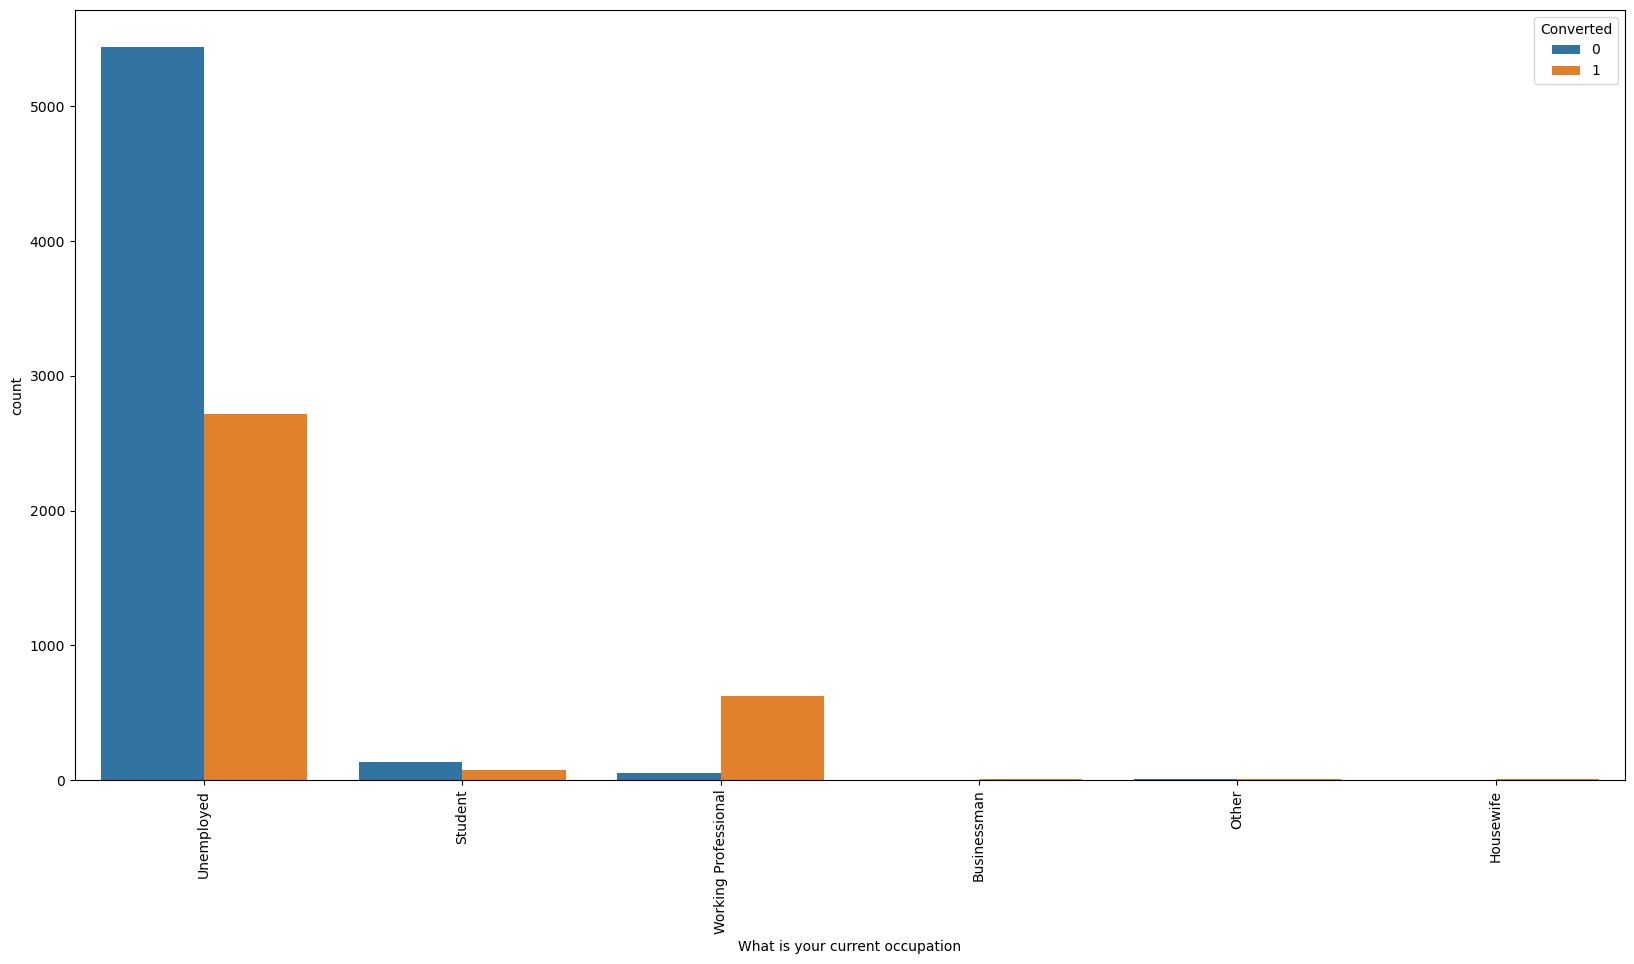

In [63]:
plt.figure(figsize=(20, 10))
sns.countplot(data = leads, x = 'What is your current occupation', hue = 'Converted')
plt.xticks(rotation = 90)
plt.show()

#### Observations -
1. Unemployed leads have more conversions in numbers - we can infer that unemployed leads are interested in courses to find alternative choices in their career
2. Working professionals have more conversion rate - we can infer that working professionals are interested in courses to upskill themselves. This means working professional have a high chance of joining a course.

In [64]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

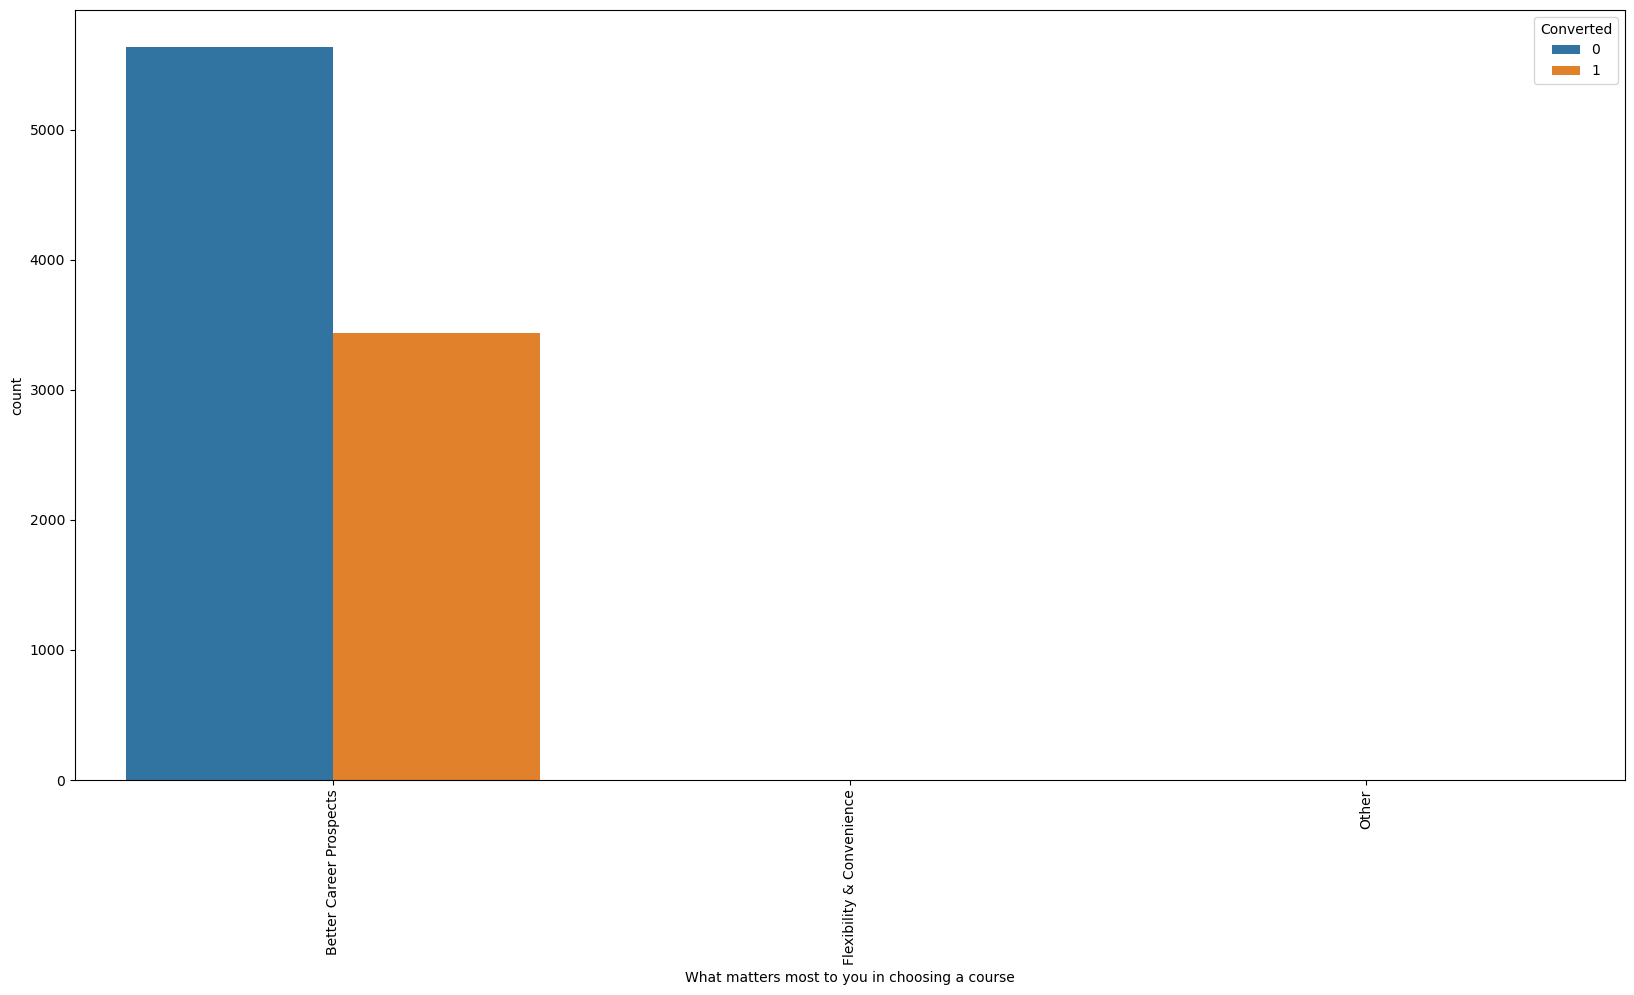

In [65]:
plt.figure(figsize=(20, 10))
sns.countplot(data = leads, x = 'What matters most to you in choosing a course', hue = 'Converted')
plt.xticks(rotation = 90)
plt.show()

#### Observations -
1. Supporting the previous observation, leads have chosen a course for "Better Career Prospect" and have decent conversion.

Let's check all the advertisement attributes and their contributions to the conversions
They are -
1. Search
2. Magazine
3. Newspaper Article
4. X Education Forums
5. Newspaper
6. Digital Advertisement

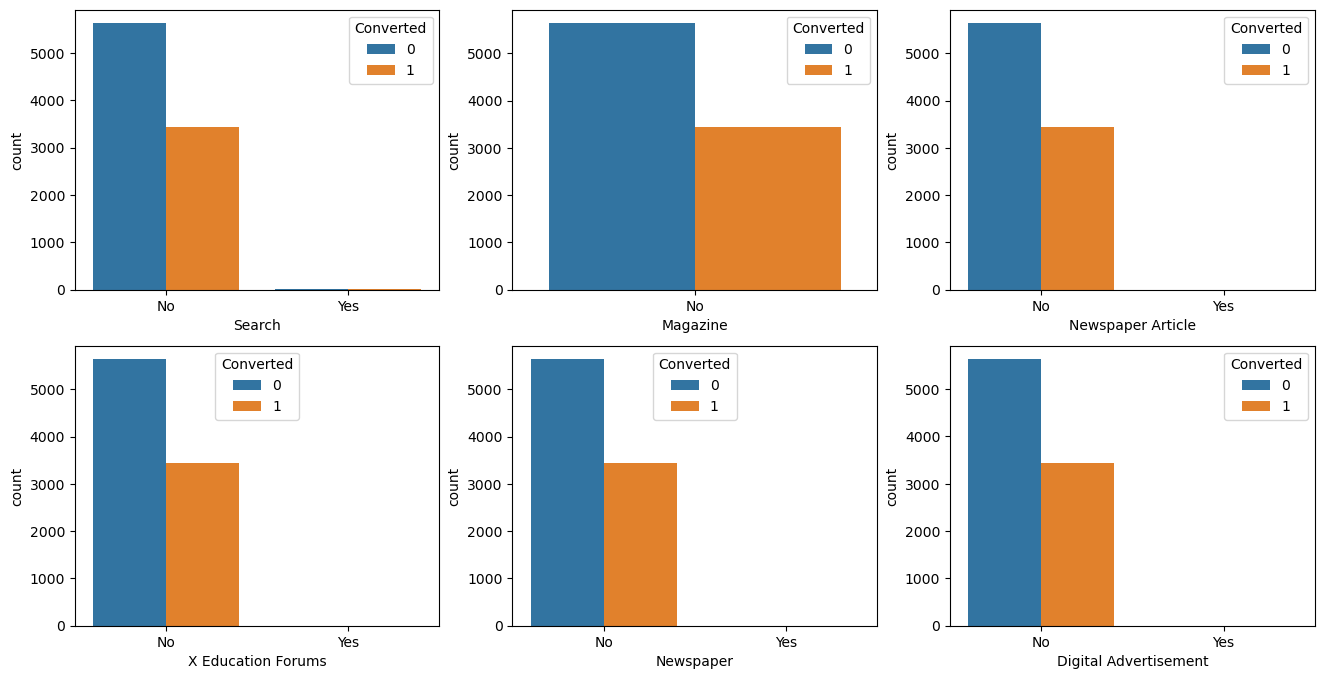

In [66]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
sns.countplot(data = leads, x = 'Search', hue = 'Converted', ax=axs[0, 0])
sns.countplot(data = leads, x = 'Magazine', hue = 'Converted', ax=axs[0, 1])
sns.countplot(data = leads, x = 'Newspaper Article', hue = 'Converted', ax=axs[0, 2])
sns.countplot(data = leads, x = 'X Education Forums', hue = 'Converted', ax=axs[1, 0])
sns.countplot(data = leads, x = 'Newspaper', hue = 'Converted', ax=axs[1, 1])
sns.countplot(data = leads, x = 'Digital Advertisement', hue = 'Converted', ax=axs[1, 2])
plt.show()

#### Observations -
1. Search has most of the entries as No with decent conversion rate, also it has some Yes(s) which has conversions
2. Magazine have all the values as No - no inference can be drawn from here
3. Newspaper article has most of the entries as No.
4. X Education Forums also has most entries as No.
5. Regular Newspaper has most entries as No.
6. Digital Advertisement has most entries as No.
7. This implies that none of the advertising media for X Education has been effective in lead conversions yet.

Let's check "Through Recommendations" attribute

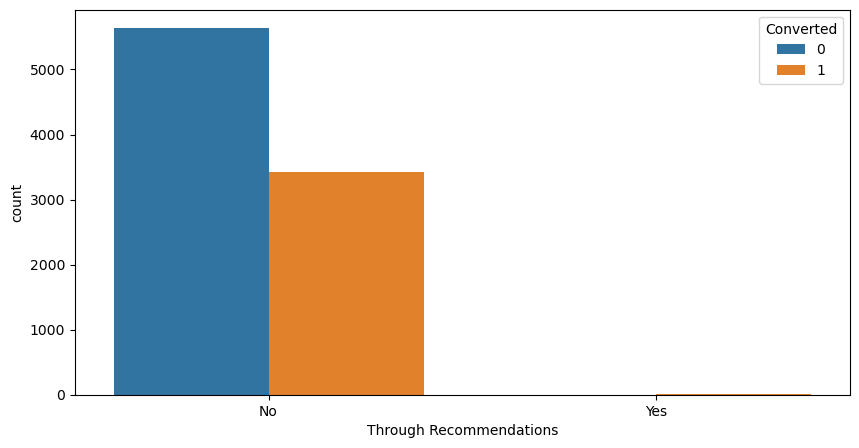

In [67]:
plt.figure(figsize=(10, 5))
sns.countplot(data = leads, x = 'Through Recommendations', hue = 'Converted')
plt.show()

#### Observations -
1. Most of the leads are not through recommendations.
2. There are a very less number of leads are through recommendation and conversion rate is high for them

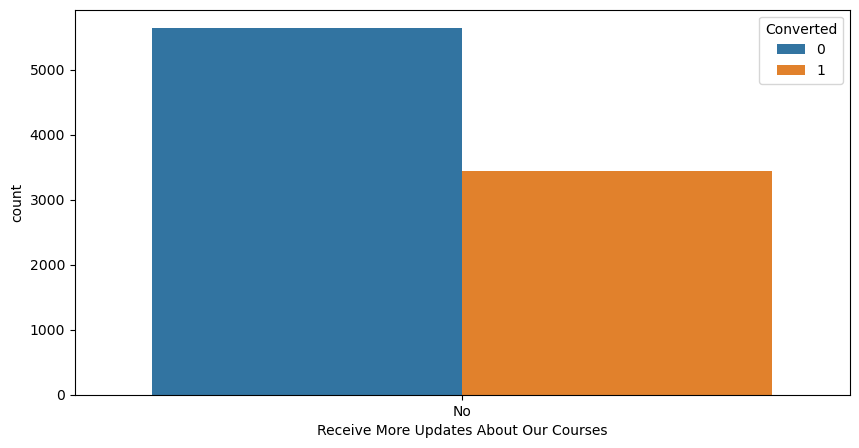

In [68]:
plt.figure(figsize=(10, 5))
sns.countplot(data = leads, x = 'Receive More Updates About Our Courses', hue = 'Converted')
plt.show()

#### Observations -
1. No leads heard about the updates about courses, X Education might have to focus on sharing updates about the courses more proactively.

Let's check "Tags" attribute

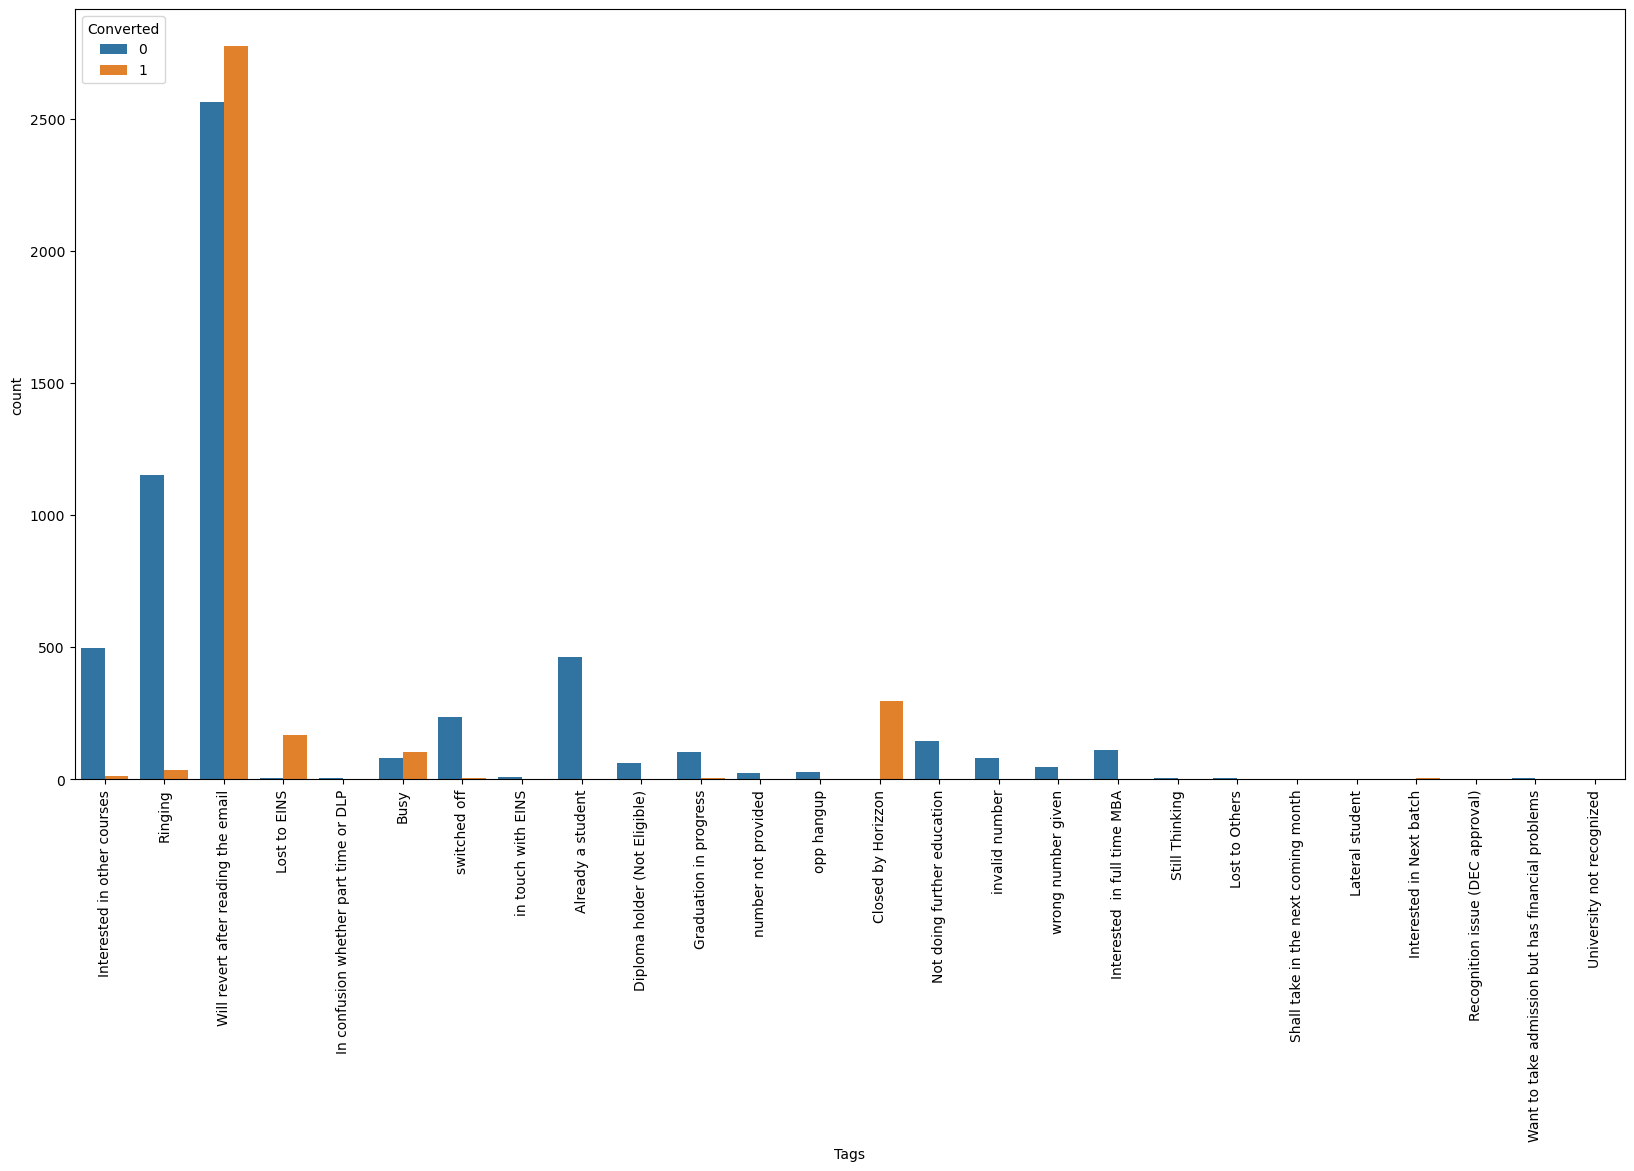

In [69]:
plt.figure(figsize=(20, 10))
sns.countplot(data = leads, x = 'Tags', hue = 'Converted')
plt.xticks(rotation=90)
plt.show()

#### Observations -
1. Many leads were converted who reverted after email and closed by Horizzon.
2. More emails could be shared for increasing conversions
3. Also this column is generated by sales or marketting team, might not be helpful for the model building - will have to remove this column.

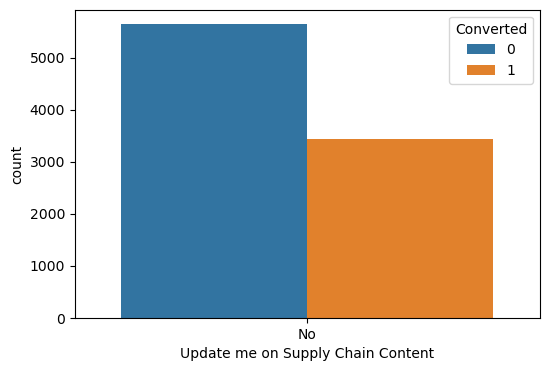

In [70]:
plt.figure(figsize=(6, 4))
sns.countplot(data = leads, x = 'Update me on Supply Chain Content', hue = 'Converted')
plt.show()

#### Observations -
1. All are No - not much inferecences to take from here

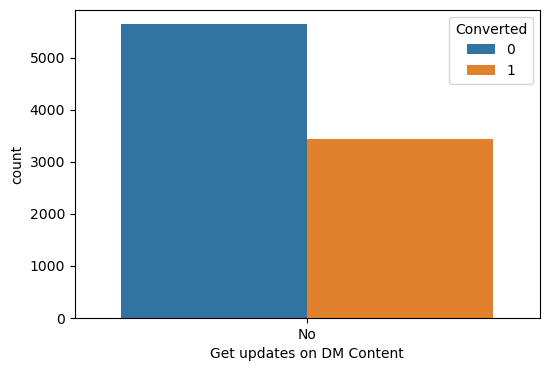

In [71]:
plt.figure(figsize=(6, 4))
sns.countplot(data = leads, x = 'Get updates on DM Content', hue = 'Converted')
plt.show()

#### Observations -
1. All leads chose No got getting updates on DM content - not much inferecences to take from here

Let's have a looks at the "City" attribute

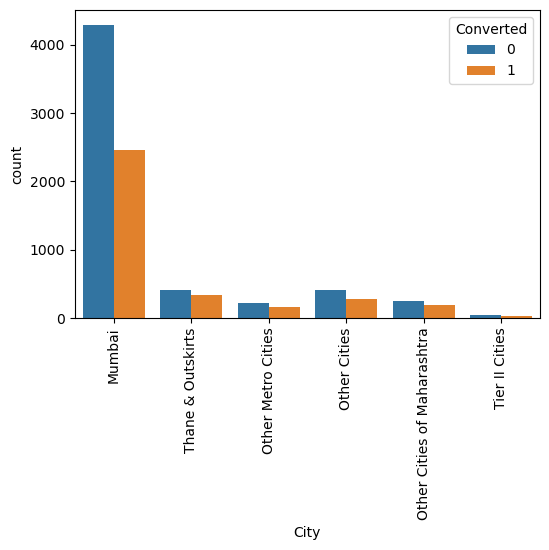

In [72]:
plt.figure(figsize=(6, 4))
sns.countplot(data = leads, x = 'City', hue = 'Converted')
plt.xticks(rotation = 90)
plt.show()

#### Observations -
1. Mumbai has the highest lead conversion in numbers.
2. Tier II cities are very less in numbers for of lead conversion
3. Thane & Outskirits, other Metro Cities, and cities have the quite high conversion rate although their number leads is low

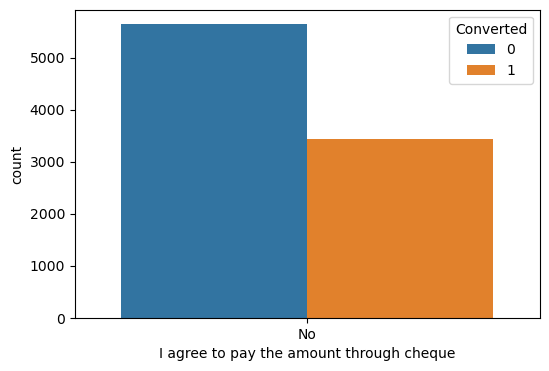

In [73]:
plt.figure(figsize=(6, 4))
sns.countplot(data = leads, x = 'I agree to pay the amount through cheque', hue = 'Converted')
plt.show()

#### Observations - 
1. All leads chose not to pay by cheque

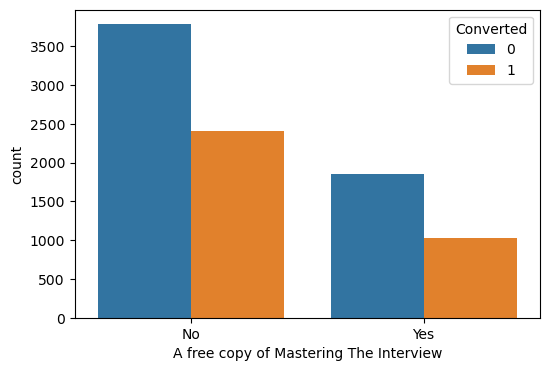

In [74]:
plt.figure(figsize=(6, 4))
sns.countplot(data = leads, x = 'A free copy of Mastering The Interview', hue = 'Converted')
plt.show()

#### Observations -
1. There are distributions among no and yes, but not much inference can be drawn from here.
2. Conversion rate seems to be similar for both yes and no

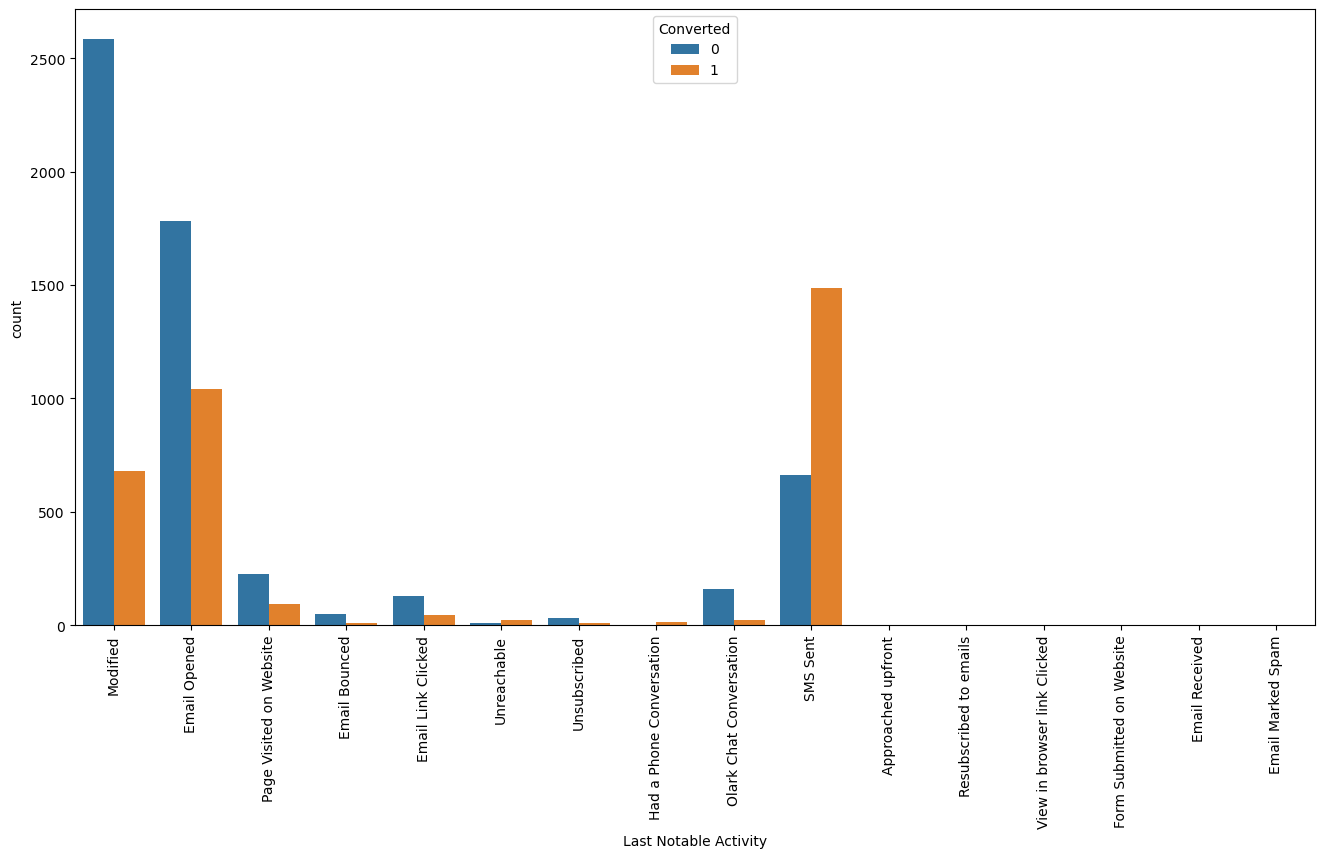

In [75]:
plt.figure(figsize=(16, 8))
sns.countplot(data = leads, x = 'Last Notable Activity', hue = 'Converted')
plt.xticks(rotation=90)
plt.show()

#### Observations -
1. Most of the conversions happened when leads opened email or and SMS was sent to the leads. This organization should keep focuse on these two process to get more engagement

#### There are many columns which are not adding much value to the future analysis, we should remove these columns.
1. Lead Number
2. Country
3. Search
4. Magazine
5. Newspaper Article
6. X Education Forums
7. Newspaper
8. Digital Advertisement
9. Through Recommendations
10. Receive More Updates About Our Courses
11. Tags
12. Update me on Supply Chain Content
13. Get updates on DM Content
14. I agree to pay the amount through cheque
15. a free copy of Mastering The Interview 

In [76]:
leads.drop(['Lead Number',
'Country',
'Search',
'Magazine',
'Newspaper Article',
'X Education Forums',
'Newspaper',
'Digital Advertisement',
'Through Recommendations',
'Receive More Updates About Our Courses',
'Tags',
'Update me on Supply Chain Content',
'Get updates on DM Content',
'I agree to pay the amount through cheque',
'A free copy of Mastering The Interview'], axis=1, inplace=True)

As observed earlier we will have to drop **"What matters most to you in choosing a course"** column too for better data preparation

In [77]:
leads.drop('What matters most to you in choosing a course', axis=1, inplace=True)

In [78]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

In [79]:
leads.shape

(9074, 14)

#### After the data clean up, we have 14 attributes for model development. 
##### There are couple of columns which are categorical i.e. yes/no - binary, and multi category. We will need to convert them to numerical form so that they can be used for model preparation.

## Data Preparation

#### There are only two columns with Binary category - 
1. Do Not Email
2. Do Not Call

We will convert the `No` to `0` and `Yes` to `1`

In [80]:
columns = ['Do Not Email', 'Do Not Call']
leads[columns] = leads[columns].apply(lambda x: x.map({ 'No': 0, 'Yes': 1}))

##### Other columns are multi-value categorical columns. They must be replaced with dummy variables. As per guidelines we will drop the first columns after converting the categorical columns to dummy vatiables.

In [81]:
columns_to_create_dummies = ['Lead Origin', 'Lead Source', 'Last Activity', 
    'Specialization', 'What is your current occupation', 
    'City', 'Last Notable Activity']
dummies = pd.get_dummies(leads[columns_to_create_dummies], drop_first=True)

In [82]:
dummies.head(3)

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  ...  \
0                      0                           0  ...   
1                      0                           0  ...   
2                      0                           0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                                  0   
2                                                  0   

[3 rows x 65 columns]

In [83]:
leads = pd.concat([leads, dummies], axis=1)

In [84]:
leads.shape

(9074, 79)

#### Let's drop the columns for which dummies are created

In [85]:
leads.drop(columns_to_create_dummies, axis=1, inplace=True)

In [86]:
leads.shape

(9074, 72)

#### We are not in position to split the data into train and test. Will be using sklearn module.

In [87]:
X = leads.drop(['Prospect ID', 'Converted'], axis=1)

In [88]:
y = leads.Converted

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [90]:
# Making sure the test-train spit is 30-70
print(round(len(X_train) / len(leads) * 100, 1))
print(round(len(X_test) / len(leads) * 100, 1))

70.0
30.0


#### There are attributes which has numerical values of different ranges. They must be scaled before considered in the model. We will be using StandardScaler for this case.

In [91]:
scaler = StandardScaler()

In [92]:
X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
3009             0            0          2.0                          397   
1012             1            0          2.0                          190   
9226             0            0          0.0                            0   
4750             0            0          2.0                         1380   
7987             0            0          5.0                         1584   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3009                   2.0                                    1   
1012                   2.0                                    1   
9226                   0.0                                    0   
4750                   2.0                                    1   
7987                   2.5                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
3009                          0                        0   
1012                          0                        0   
9226                          0                        0   
4750                          0                        0   
7987                          0                        0   

      Lead Source_Facebook  Lead Source_Google  ...  \
3009                     0                   0  ...   
1012                     0                   0  ...   
9226                     0                   0  ...   
4750                     0                   0  ...   
7987                     0                   0  ...   

      Last Notable Activity_Form Submitted on Website  \
3009                                                0   
1012                                                0   
9226                                                0   
4750                                                0   
7987                                                0   

      Last Notable Activity_Had a Phone Conversation  \
3009                                               0   
1012                                               0   
9226                                               0   
4750                                               0   
7987                                               0   

      Last Notable Activity_Modified  \
3009                               0   
1012                               0   
9226                               1   
4750                               0   
7987                               1   

      Last Notable Activity_Olark Chat Conversation  \
3009                                              0   
1012                                              0   
9226                                              0   
4750                                              0   
7987                                              0   

      Last Notable Activity_Page Visited on Website  \
3009                                              0   
1012                                              0   
9226                                              0   
4750                                              0   
7987                                              0   

      Last Notable Activity_Resubscribed to emails  \
3009                                             0   
1012                                             0   
9226                                             0   
4750                                             0   
7987                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3009                               0                                  0   
1012                               0                                  0   
9226                               0                                  0   
4750                               1                                  0   
7987                               0                                  0   

      Last Notable Activity_Unsubscribed  \
3009                                   0   
1

In [93]:
columns_to_scale = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [94]:
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

In [95]:
X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
3009             0            0    -0.432779                    -0.160255   
1012             1            0    -0.432779                    -0.540048   
9226             0            0    -1.150329                    -0.888650   
4750             0            0    -0.432779                     1.643304   
7987             0            0     0.643547                     2.017593   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3009             -0.155018                                    1   
1012             -0.155018                                    1   
9226             -1.265540                                    0   
4750             -0.155018                                    1   
7987              0.122613                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
3009                          0                        0   
1012                          0                        0   
9226                          0                        0   
4750                          0                        0   
7987                          0                        0   

      Lead Source_Facebook  Lead Source_Google  ...  \
3009                     0                   0  ...   
1012                     0                   0  ...   
9226                     0                   0  ...   
4750                     0                   0  ...   
7987                     0                   0  ...   

      Last Notable Activity_Form Submitted on Website  \
3009                                                0   
1012                                                0   
9226                                                0   
4750                                                0   
7987                                                0   

      Last Notable Activity_Had a Phone Conversation  \
3009                                               0   
1012                                               0   
9226                                               0   
4750                                               0   
7987                                               0   

      Last Notable Activity_Modified  \
3009                               0   
1012                               0   
9226                               1   
4750                               0   
7987                               1   

      Last Notable Activity_Olark Chat Conversation  \
3009                                              0   
1012                                              0   
9226                                              0   
4750                                              0   
7987                                              0   

      Last Notable Activity_Page Visited on Website  \
3009                                              0   
1012                                              0   
9226                                              0   
4750                                              0   
7987                                              0   

      Last Notable Activity_Resubscribed to emails  \
3009                                             0   
1012                                             0   
9226                                             0   
4750                                             0   
7987                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3009                               0                                  0   
1012                               0                                  0   
9226                               0                                  0   
4750                               1                                  0   
7987                               0                                  0   

      Last Notable Activity_Unsubscribed  \
3009                                   0   
1

#### Checking correlations among the features

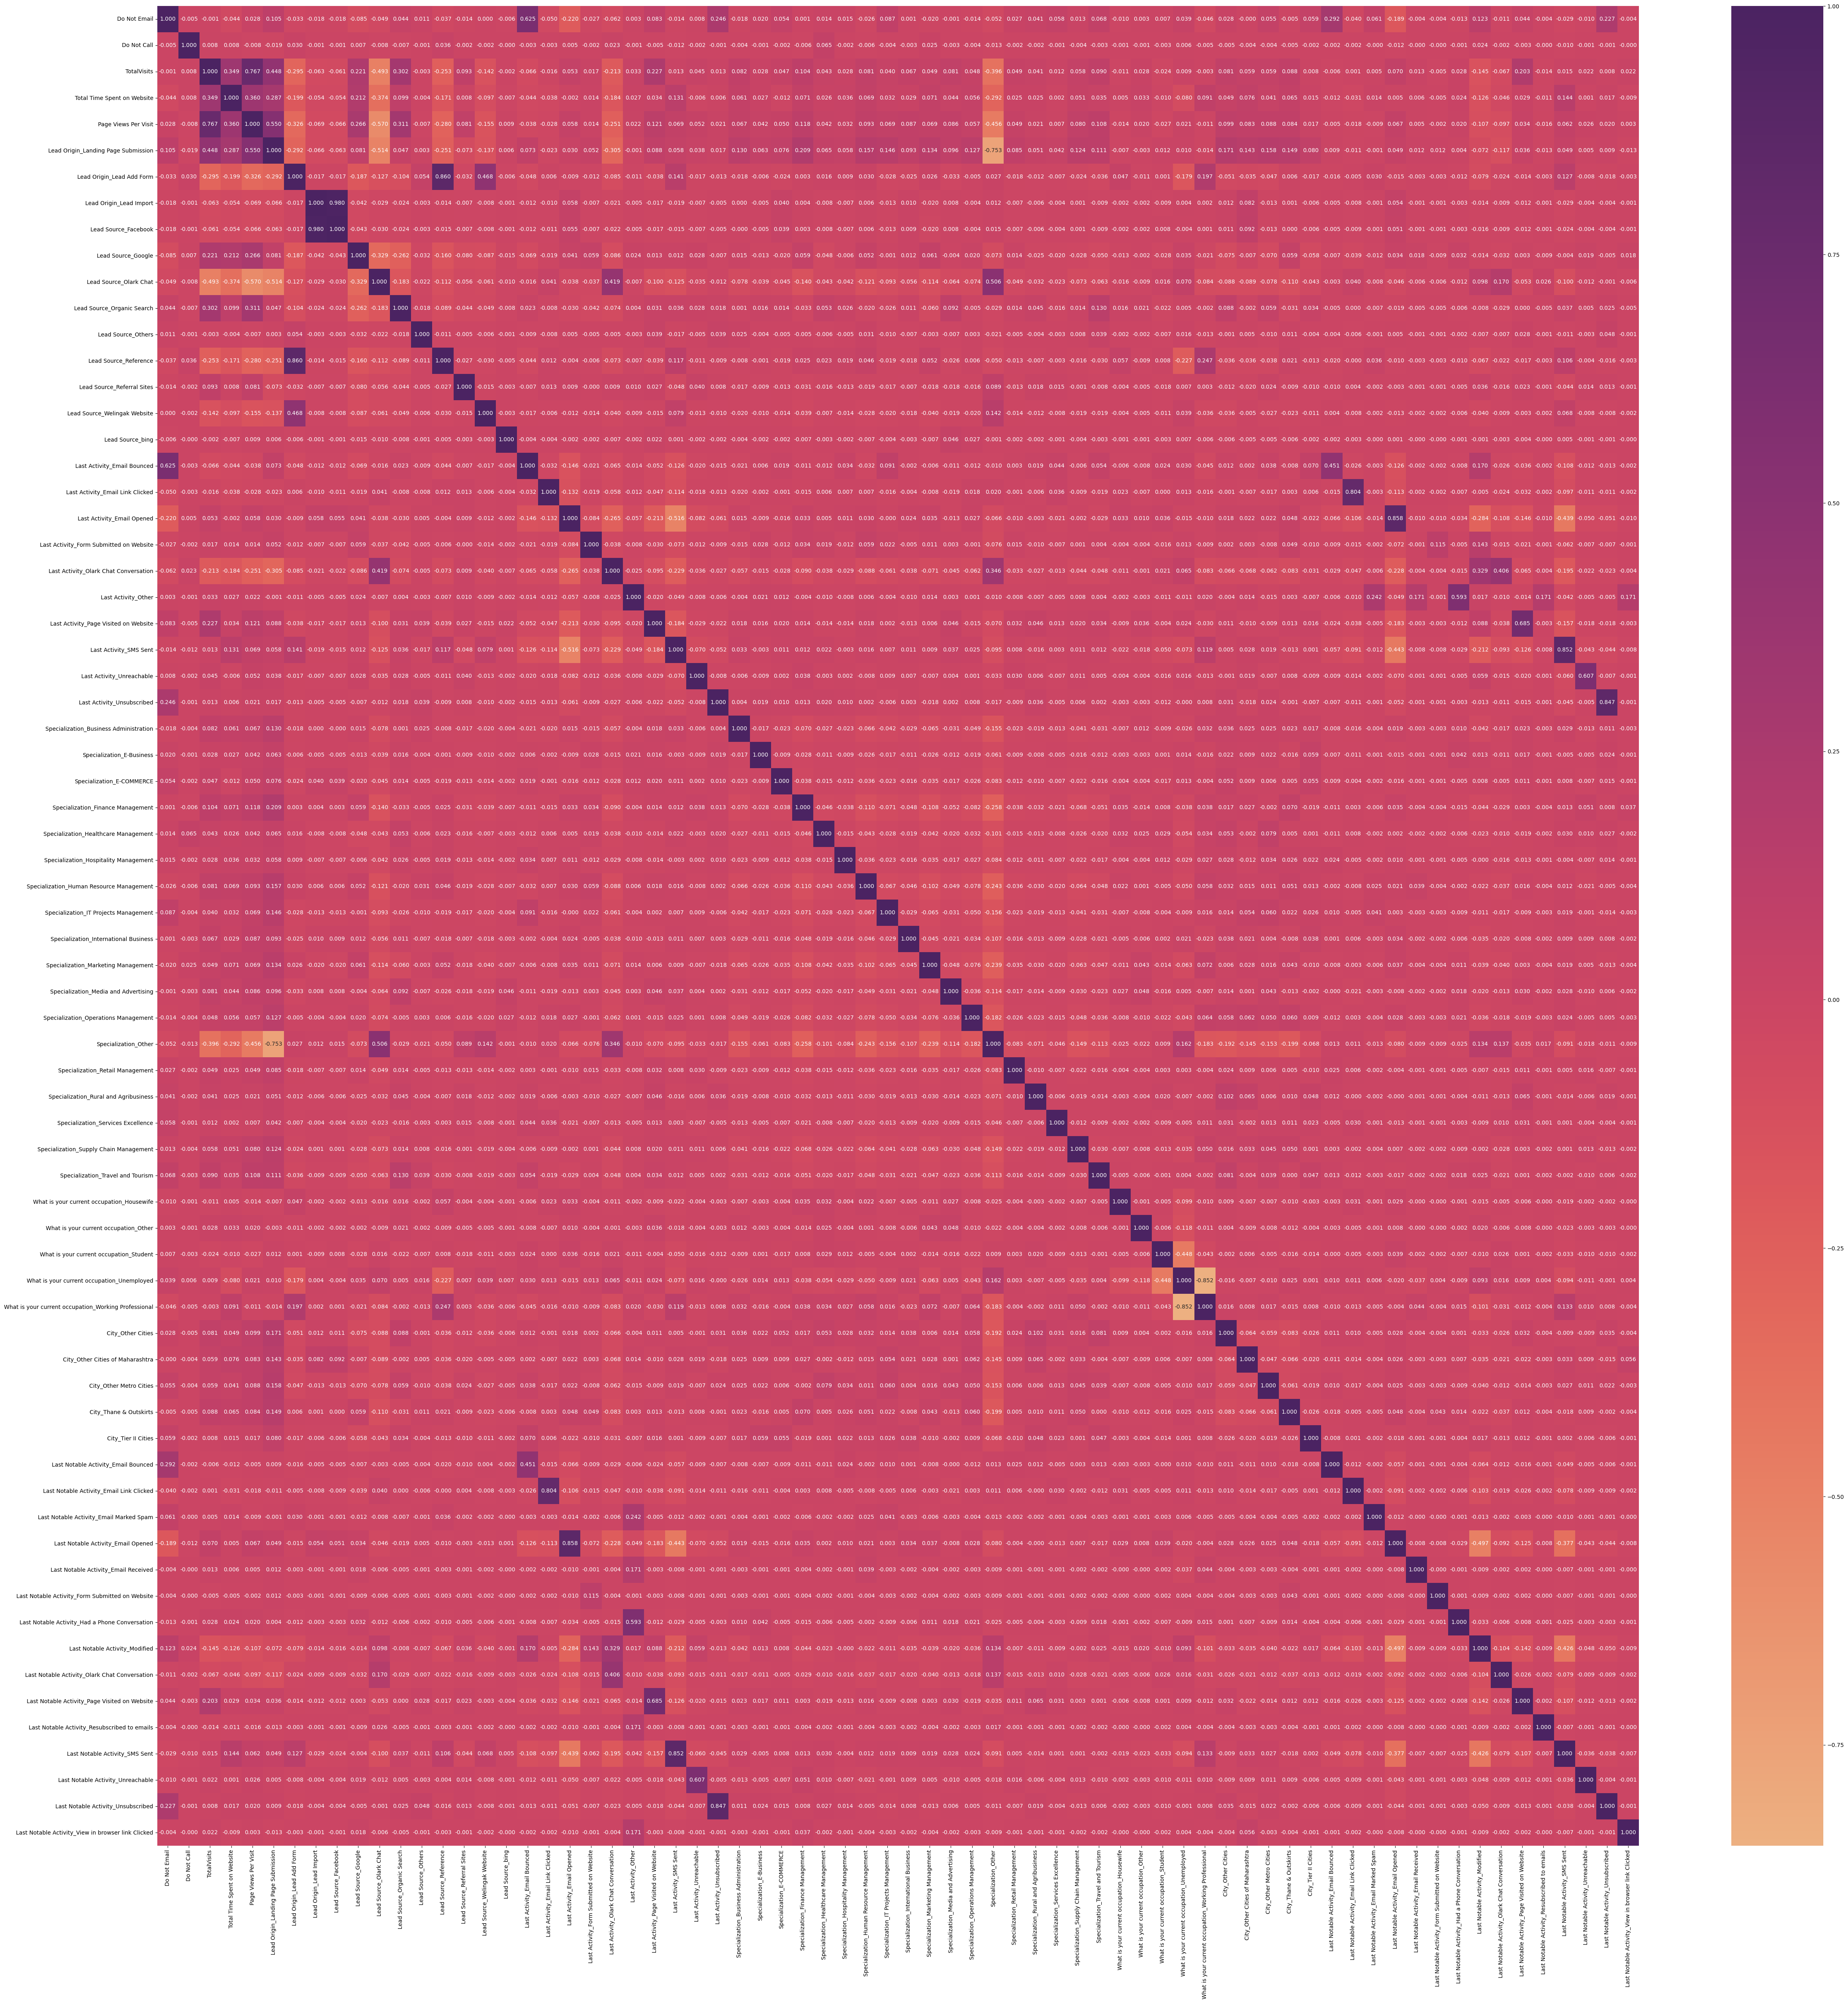

In [96]:
plt.figure(figsize = (60,60))
sns.heatmap(X_train.corr(), annot = True, fmt=".3f", cmap="flare")
plt.show()

#### There are certain columns which are highly correlated to each other. e.g.
1. Last Activity_Email Bounced
2. Lead Source_Reference
3. Lead Source_Facebook
4. Lead Origin_Landing Page Submission
5. Last Notable Activity_SMS Sent
6. Last Notable Activity_Email Opened
7. Last Notable Activity_Had a Phone Conversation
8. Last Notable Activity_Page Visited on Website
9. Last Notable Activity_Unreachable
10. Last Notable Activity_Unsubscribed
11. Last Notable Activity_Email Link Clicked

#### Also there is high correlation between
1. `TotalVisits` and `Page Views Per Visit` 
2. `Landing Page Submission` and `Page Views Per Visit` 
3. `Lead Origin_Landing Page Submission` and `TotalVisits` 
but we should not drop these Features, they might attribute to the final model selection

In [97]:
columns_to_drop = ['Last Activity_Email Bounced'
,'Lead Source_Reference'
,'Lead Source_Facebook'
,'Lead Origin_Landing Page Submission'
,'Last Notable Activity_SMS Sent'
,'Last Notable Activity_Email Opened'
,'Last Notable Activity_Had a Phone Conversation'
,'Last Notable Activity_Page Visited on Website'
,'Last Notable Activity_Unreachable'
,'Last Notable Activity_Unsubscribed'
,'Last Notable Activity_Email Link Clicked']

X_train = X_train.drop(columns_to_drop, axis=1)
X_test = X_test.drop(columns_to_drop, axis=1)

#### Checking the correlation again

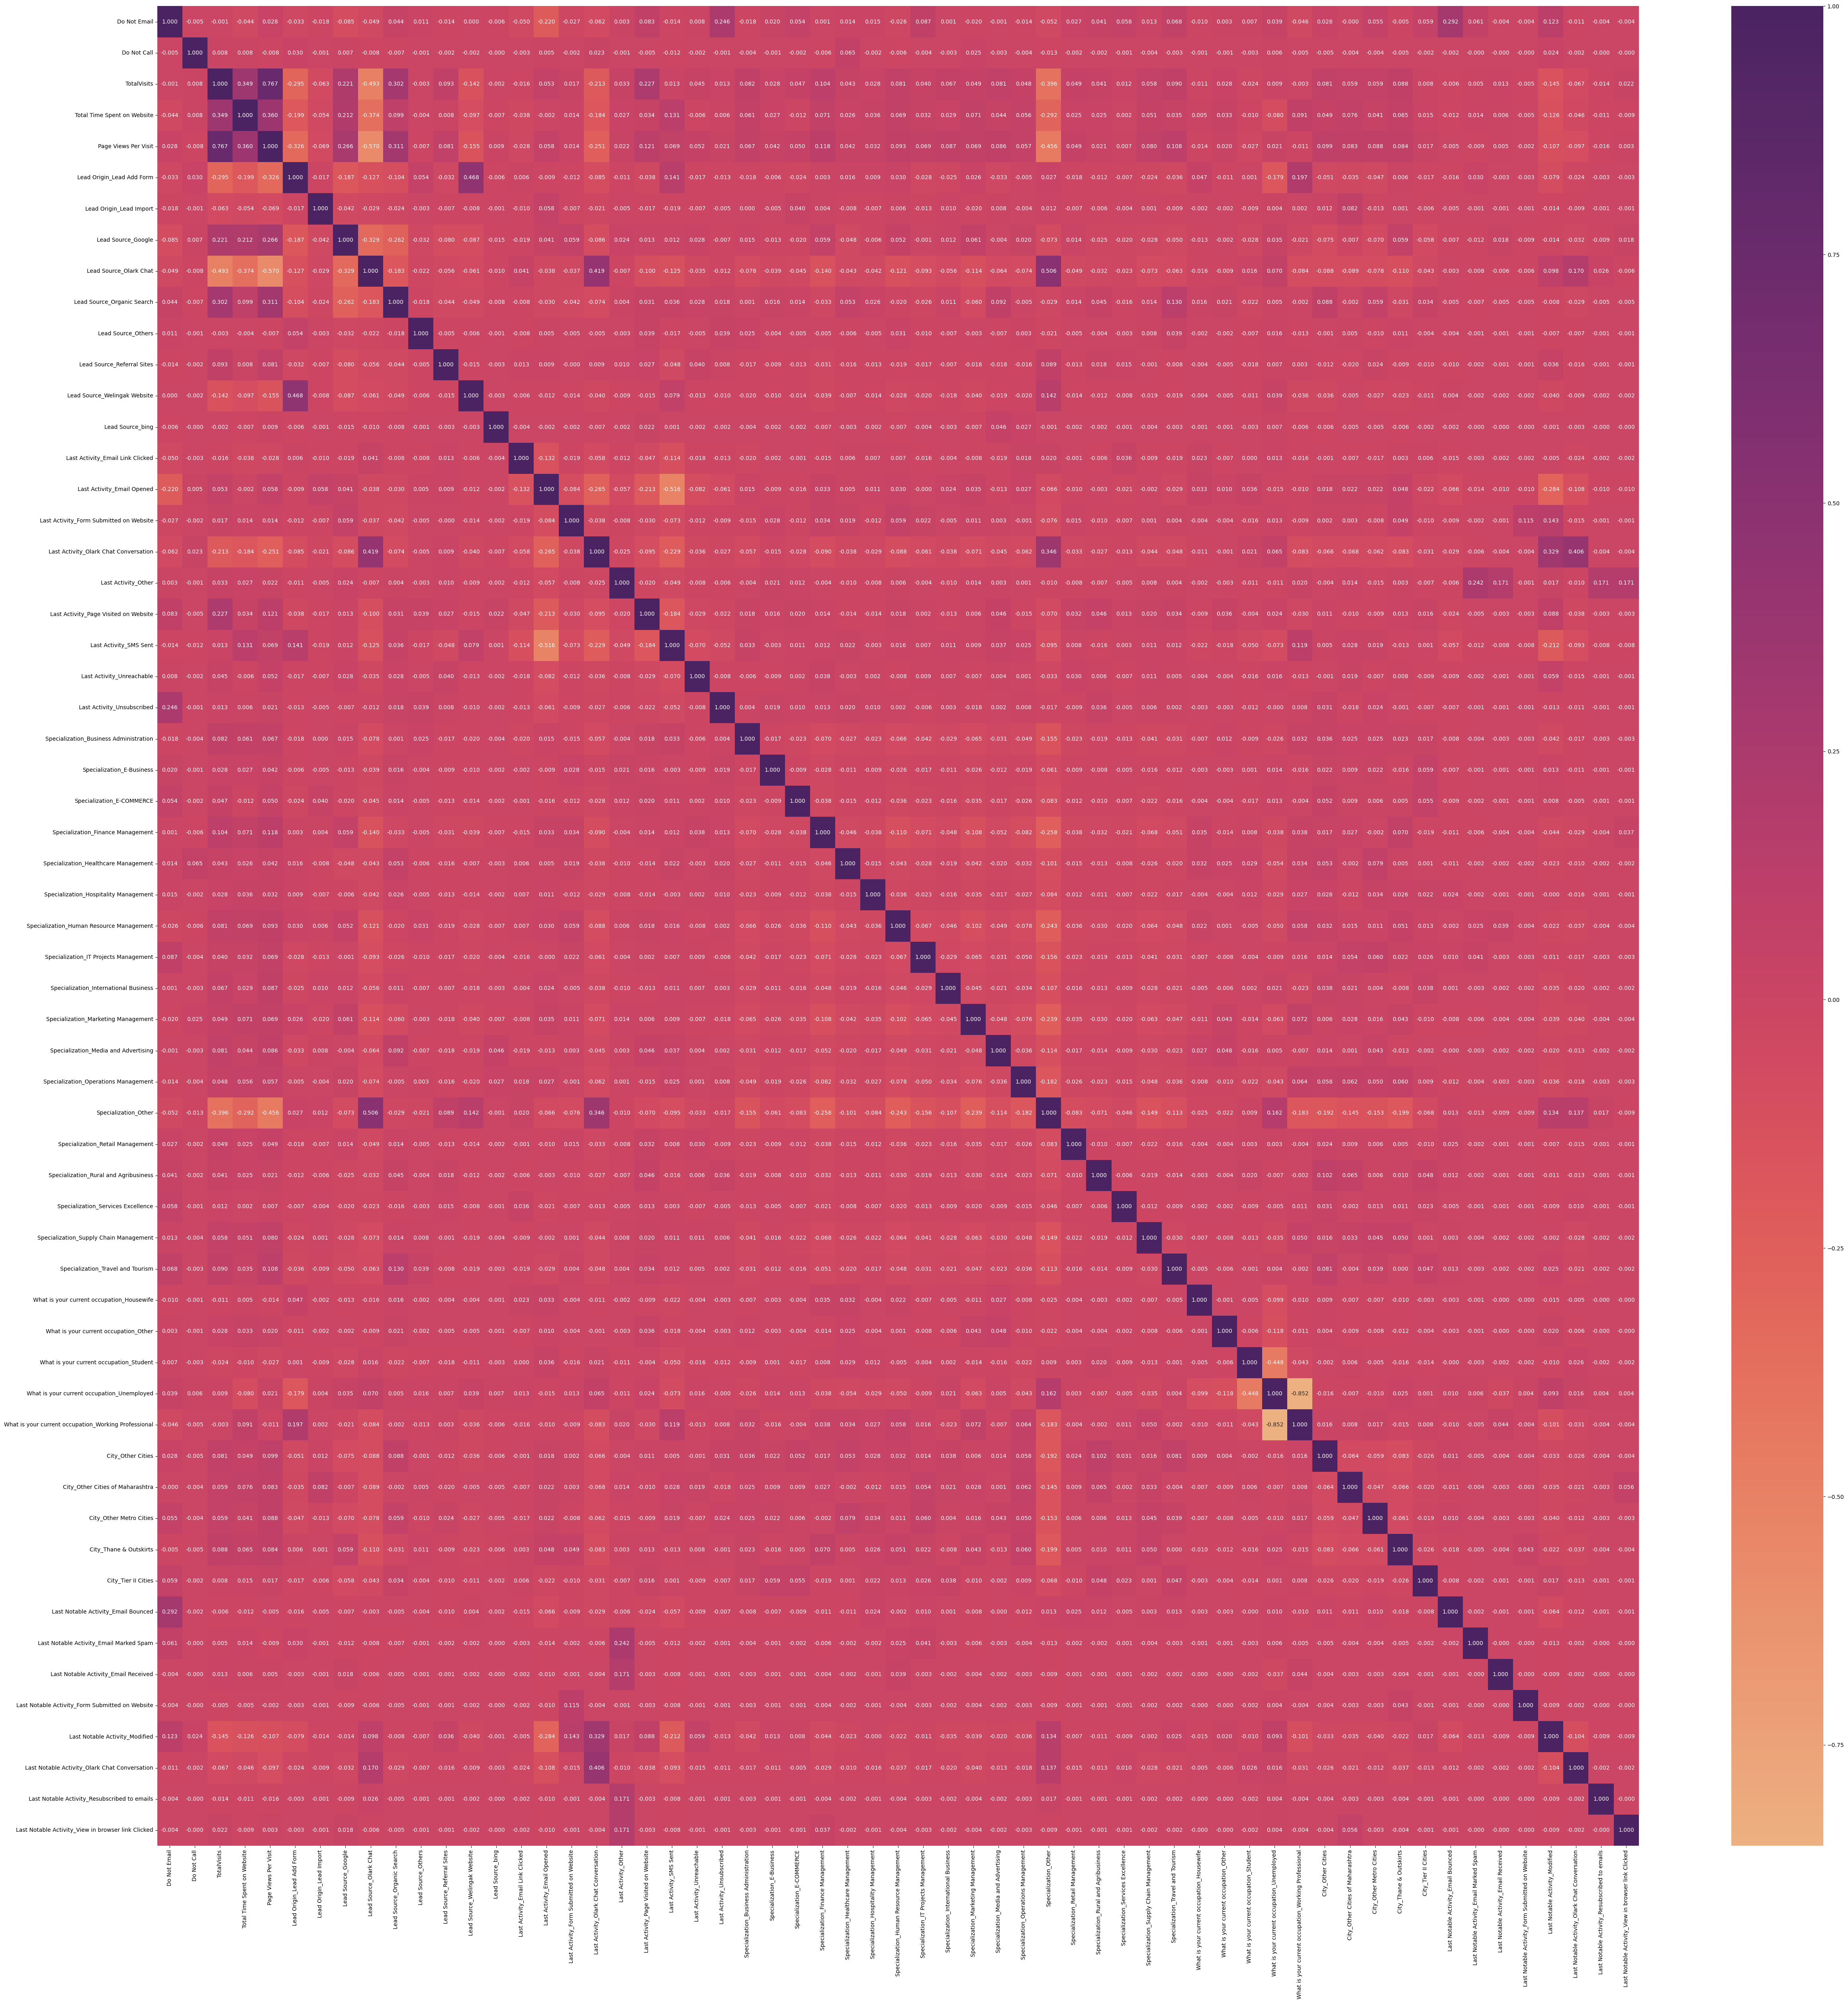

In [98]:
plt.figure(figsize = (60,60))
sns.heatmap(X_train.corr(), annot = True, fmt=".3f", cmap="flare")
plt.show()

#### Now we are in a position to proceed for feature selection using RFE.

In [99]:
lr = LogisticRegression()

# Running Feature Selection and select 25 Features
rfe = RFE(estimator = lr, n_features_to_select = 25)
rfe = rfe.fit(X_train, y_train)

In [100]:
rfe.support_

array([ True,  True, False,  True, False,  True,  True,  True,  True,
       False, False, False,  True,  True, False, False, False,  True,
        True, False,  True,  True,  True, False, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
       False, False, False, False, False,  True, False,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False,  True,  True, False,  True])

#### Let's check the ranking and the RFE selection criteria with training data

In [101]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 8),
 ('Lead Source_Others', False, 32),
 ('Lead Source_Referral Sites', False, 11),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', True, 1),
 ('Last Activity_Email Link Clicked', False, 29),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on Website', False, 14),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other', True, 1),
 ('Last Activity_Page Visited on Website', False, 28),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', True, 1),
 ('Last Activity_Unsubscribed', True, 1),
 ('Specialization_Business Administration', False, 18),
 ('Specializati

#### Let's find out the Feature selected by RFE

In [102]:
columns_selected_by_rfe = X_train.columns[rfe.support_]

In [103]:
columns_selected_by_rfe

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'Specialization_Media and Advertising', 'Specialization_Other',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object')

#### As we have got the first feature set selected by RFE we can start with the model building

## Model Building

In [104]:
logm1 = sm.GLM(y_train, (sm.add_constant(X_train[columns_selected_by_rfe])), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.6
Date:                Mon, 14 Aug 2023   Deviance:                       5229.3
Time:                        21:10:07   Pearson chi2:                 6.44e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3993
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1485      0.620      0.240      0.811      -1.066       1.363
Do Not Email                                            -1.6486      0.190     -8.664      0.000      -2.022      -1.276
Do Not Call                                             22.3394   3.39e+04      0.001      0.999   -6.65e+04    6.65e+04
Total Time Spent on Website                              1.1270      0.041     27.619      0.000       1.047       1.207
Lead Origin_Lead Add Form                                4.1359      0.228     18.138      0.000       3.689       4.583
Lead Origin_Lead Import                                  1.7793      0.464      3.833      0.000       0.869       2.689
Lead Source_Google                                       0.3874      0.080      4.818      0.000       0.230       0.545
Lead Source_Olark Chat                                   1.6802      0.127     13.250      0.000       1.432       1.929
Lead Source_Welingak Website                             2.2822      0.755      3.022      0.003       0.802       3.762
Lead Source_bing                                         0.9645      1.370      0.704      0.481      -1.721       3.650
Last Activity_Olark Chat Conversation                   -0.6908      0.195     -3.548      0.000      -1.072      -0.309
Last Activity_Other                                      2.4294      0.485      5.011      0.000       1.479       3.380
Last Activity_SMS Sent                                   1.3213      0.076     17.469      0.000       1.173       1.470
Last Activity_Unreachable                                0.7852      0.317      2.478      0.013       0.164       1.406
Last Activity_Unsubscribed                               1.4341      0.475      3.017      0.003       0.502       2.366
Specialization_Hospitality Management                   -0.3859      0.320     -1.206      0.228      -1.013       0.241
Specialization_Media and Advertising                    -0.3478      0.229     -1.522      0.128      -0.796       0.100
Specialization_Other                                    -0.4511      0.089     -5.052      0.000      -0.626      -0.276
What is your current occupation_Housewife               21.4286   1.56e+04      0.001      0.999   -3.05e+04    3.06e+04
What is your current occupation_Student                 -0.9935      0.658     -1.510      0.131      -2.283       0.296
What is your current occupation_Unemployed              -1.4346      0.619     -2.317      0.021      -2.648      -0.221
What is your current occupation_Working Professional     1.2779      0.645      1.981      0.048       0.014       2.542
City_Tier II Cities                                     -0

#### `What is your current occupation_Housewife` , `Do Not Call` and  `Last Notable Activity_View in browser link Clicked` has very high P-Value. This column need to be dropped

In [105]:
columns_selected_by_rfe = columns_selected_by_rfe.drop(["What is your current occupation_Housewife",
                                                        "Do Not Call",
                                                        "Last Notable Activity_View in browser link Clicked"])

In [106]:
logm2 = sm.GLM(y_train, (sm.add_constant(X_train[columns_selected_by_rfe])), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2618.5
Date:                Mon, 14 Aug 2023   Deviance:                       5237.0
Time:                        21:10:08   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3986
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5585      0.569      0.982      0.326      -0.556       1.673
Do Not Email                                            -1.6525      0.190     -8.676      0.000      -2.026      -1.279
Total Time Spent on Website                              1.1276      0.041     27.659      0.000       1.048       1.207
Lead Origin_Lead Add Form                                4.1598      0.228     18.244      0.000       3.713       4.607
Lead Origin_Lead Import                                  1.7791      0.464      3.832      0.000       0.869       2.689
Lead Source_Google                                       0.3858      0.080      4.801      0.000       0.228       0.543
Lead Source_Olark Chat                                   1.6799      0.127     13.252      0.000       1.431       1.928
Lead Source_Welingak Website                             2.2599      0.755      2.992      0.003       0.780       3.740
Lead Source_bing                                         0.9639      1.370      0.704      0.482      -1.721       3.649
Last Activity_Olark Chat Conversation                   -0.6818      0.193     -3.525      0.000      -1.061      -0.303
Last Activity_Other                                      2.2836      0.464      4.924      0.000       1.375       3.193
Last Activity_SMS Sent                                   1.3202      0.076     17.452      0.000       1.172       1.469
Last Activity_Unreachable                                0.7819      0.317      2.464      0.014       0.160       1.404
Last Activity_Unsubscribed                               1.4370      0.475      3.023      0.003       0.505       2.369
Specialization_Hospitality Management                   -0.3897      0.320     -1.217      0.223      -1.017       0.238
Specialization_Media and Advertising                    -0.3482      0.228     -1.525      0.127      -0.796       0.099
Specialization_Other                                    -0.4532      0.089     -5.078      0.000      -0.628      -0.278
What is your current occupation_Student                 -1.4036      0.611     -2.298      0.022      -2.601      -0.207
What is your current occupation_Unemployed              -1.8430      0.569     -3.239      0.001      -2.958      -0.728
What is your current occupation_Working Professional     0.8686      0.597      1.455      0.146      -0.302       2.039
City_Tier II Cities                                     -0.5590      0.453     -1.235      0.217      -1.446       0.328
Last Notable Activity_Modified                          -0.9409      0.084    -11.194      0.000      -1.106      -0.776
Last Notable Activity_Olark Chat Conversation           -0

#### `Lead Source_bing` has a very high P-Value, Need to remove this column.

In [107]:
columns_selected_by_rfe = columns_selected_by_rfe.drop("Lead Source_bing")

In [108]:
logm3 = sm.GLM(y_train, (sm.add_constant(X_train[columns_selected_by_rfe])), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2618.7
Date:                Mon, 14 Aug 2023   Deviance:                       5237.4
Time:                        21:10:08   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3985
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5580      0.569      0.981      0.327      -0.557       1.673
Do Not Email                                            -1.6531      0.190     -8.680      0.000      -2.026      -1.280
Total Time Spent on Website                              1.1270      0.041     27.655      0.000       1.047       1.207
Lead Origin_Lead Add Form                                4.1579      0.228     18.238      0.000       3.711       4.605
Lead Origin_Lead Import                                  1.7768      0.464      3.828      0.000       0.867       2.687
Lead Source_Google                                       0.3845      0.080      4.787      0.000       0.227       0.542
Lead Source_Olark Chat                                   1.6780      0.127     13.242      0.000       1.430       1.926
Lead Source_Welingak Website                             2.2599      0.755      2.992      0.003       0.780       3.740
Last Activity_Olark Chat Conversation                   -0.6817      0.193     -3.525      0.000      -1.061      -0.303
Last Activity_Other                                      2.2830      0.464      4.922      0.000       1.374       3.192
Last Activity_SMS Sent                                   1.3203      0.076     17.453      0.000       1.172       1.469
Last Activity_Unreachable                                0.7813      0.317      2.463      0.014       0.159       1.403
Last Activity_Unsubscribed                               1.4367      0.475      3.022      0.003       0.505       2.369
Specialization_Hospitality Management                   -0.3897      0.320     -1.218      0.223      -1.017       0.238
Specialization_Media and Advertising                    -0.3368      0.228     -1.480      0.139      -0.783       0.109
Specialization_Other                                    -0.4529      0.089     -5.074      0.000      -0.628      -0.278
What is your current occupation_Student                 -1.4023      0.611     -2.296      0.022      -2.599      -0.205
What is your current occupation_Unemployed              -1.8412      0.569     -3.235      0.001      -2.957      -0.726
What is your current occupation_Working Professional     0.8695      0.597      1.456      0.145      -0.301       2.040
City_Tier II Cities                                     -0.5602      0.453     -1.238      0.216      -1.447       0.327
Last Notable Activity_Modified                          -0.9410      0.084    -11.195      0.000      -1.106      -0.776
Last Notable Activity_Olark Chat Conversation           -0.7521      0.370     -2.033      0.042      -1.477      -0.027
==========================================================

#### Still there are few Features which have high P-Value. Let's try to remove them one by one.
#### One of them `Specialization_Hospitality Management`.

In [109]:
columns_selected_by_rfe = columns_selected_by_rfe.drop("Specialization_Hospitality Management")

In [110]:
logm4 = sm.GLM(y_train, (sm.add_constant(X_train[columns_selected_by_rfe])), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2619.5
Date:                Mon, 14 Aug 2023   Deviance:                       5238.9
Time:                        21:10:08   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3984
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5583      0.569      0.982      0.326      -0.556       1.673
Do Not Email                                            -1.6547      0.190     -8.694      0.000      -2.028      -1.282
Total Time Spent on Website                              1.1253      0.041     27.648      0.000       1.045       1.205
Lead Origin_Lead Add Form                                4.1430      0.227     18.235      0.000       3.698       4.588
Lead Origin_Lead Import                                  1.7778      0.464      3.831      0.000       0.868       2.687
Lead Source_Google                                       0.3852      0.080      4.797      0.000       0.228       0.543
Lead Source_Olark Chat                                   1.6755      0.127     13.229      0.000       1.427       1.924
Lead Source_Welingak Website                             2.2730      0.755      3.011      0.003       0.793       3.753
Last Activity_Olark Chat Conversation                   -0.6814      0.193     -3.524      0.000      -1.060      -0.302
Last Activity_Other                                      2.2869      0.464      4.933      0.000       1.378       3.195
Last Activity_SMS Sent                                   1.3202      0.076     17.456      0.000       1.172       1.468
Last Activity_Unreachable                                0.7788      0.317      2.457      0.014       0.158       1.400
Last Activity_Unsubscribed                               1.4328      0.477      3.002      0.003       0.497       2.368
Specialization_Media and Advertising                    -0.3296      0.227     -1.449      0.147      -0.775       0.116
Specialization_Other                                    -0.4455      0.089     -5.004      0.000      -0.620      -0.271
What is your current occupation_Student                 -1.4116      0.610     -2.312      0.021      -2.608      -0.215
What is your current occupation_Unemployed              -1.8473      0.569     -3.247      0.001      -2.962      -0.732
What is your current occupation_Working Professional     0.8583      0.597      1.438      0.150      -0.311       2.028
City_Tier II Cities                                     -0.5683      0.454     -1.253      0.210      -1.457       0.321
Last Notable Activity_Modified                          -0.9425      0.084    -11.213      0.000      -1.107      -0.778
Last Notable Activity_Olark Chat Conversation           -0.7504      0.370     -2.029      0.042      -1.475      -0.026
========================================================================================================================
"""

#### `City_Tier II Cities` has high P-Value. This feature need to be removed.

In [111]:
columns_selected_by_rfe = columns_selected_by_rfe.drop("City_Tier II Cities")

In [112]:
logm5 = sm.GLM(y_train, (sm.add_constant(X_train[columns_selected_by_rfe])), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2620.3
Date:                Mon, 14 Aug 2023   Deviance:                       5240.6
Time:                        21:10:08   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3982
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5569      0.569      0.979      0.327      -0.558       1.671
Do Not Email                                            -1.6615      0.190     -8.744      0.000      -2.034      -1.289
Total Time Spent on Website                              1.1251      0.041     27.654      0.000       1.045       1.205
Lead Origin_Lead Add Form                                4.1502      0.227     18.270      0.000       3.705       4.595
Lead Origin_Lead Import                                  1.7848      0.464      3.847      0.000       0.875       2.694
Lead Source_Google                                       0.3928      0.080      4.904      0.000       0.236       0.550
Lead Source_Olark Chat                                   1.6809      0.127     13.277      0.000       1.433       1.929
Lead Source_Welingak Website                             2.2727      0.755      3.010      0.003       0.793       3.753
Last Activity_Olark Chat Conversation                   -0.6801      0.193     -3.517      0.000      -1.059      -0.301
Last Activity_Other                                      2.2902      0.463      4.942      0.000       1.382       3.199
Last Activity_SMS Sent                                   1.3198      0.076     17.453      0.000       1.172       1.468
Last Activity_Unreachable                                0.7828      0.317      2.469      0.014       0.161       1.404
Last Activity_Unsubscribed                               1.4438      0.477      3.027      0.002       0.509       2.379
Specialization_Media and Advertising                    -0.3305      0.228     -1.452      0.147      -0.777       0.116
Specialization_Other                                    -0.4422      0.089     -4.968      0.000      -0.617      -0.268
What is your current occupation_Student                 -1.4143      0.611     -2.317      0.021      -2.611      -0.218
What is your current occupation_Unemployed              -1.8540      0.569     -3.259      0.001      -2.969      -0.739
What is your current occupation_Working Professional     0.8491      0.597      1.423      0.155      -0.321       2.019
Last Notable Activity_Modified                          -0.9436      0.084    -11.232      0.000      -1.108      -0.779
Last Notable Activity_Olark Chat Conversation           -0.7517      0.370     -2.033      0.042      -1.476      -0.027
========================================================================================================================
"""

#### There are few more Features which have little high P-Values, but we will see VIFs now to eliminate further features.

In [113]:
def check_vif(dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [114]:
check_vif(X_train[columns_selected_by_rfe])

Features   VIF
15         What is your current occupation_Unemployed  3.88
13                               Specialization_Other  2.43
5                              Lead Source_Olark Chat  2.38
17                     Last Notable Activity_Modified  2.03
7               Last Activity_Olark Chat Conversation  1.96
4                                  Lead Source_Google  1.83
2                           Lead Origin_Lead Add Form  1.68
9                              Last Activity_SMS Sent  1.64
6                        Lead Source_Welingak Website  1.37
16  What is your current occupation_Working Profes...  1.34
18      Last Notable Activity_Olark Chat Conversation  1.33
1                         Total Time Spent on Website  1.33
0                                        Do Not Email  1.22
11                         Last Activity_Unsubscribed  1.08
14            What is your current occupation_Student  1.05
12               Specialization_Media and Advertising  1.04
10                          Last Activity_Unreachable  1.03
3                             Lead Origin_Lead Import  1.02
8                                 Last Activity_Other  1.01

#### `What is your current occupation_Unemployed` has a little high VIF we can try dropping this and check the model again

In [115]:
columns_selected_by_rfe = columns_selected_by_rfe.drop("What is your current occupation_Unemployed")

In [116]:
logm6 = sm.GLM(y_train, (sm.add_constant(X_train[columns_selected_by_rfe])), family = sm.families.Binomial())
logm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.1
Date:                Mon, 14 Aug 2023   Deviance:                       5252.3
Time:                        21:10:08   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3971
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2829      0.070    -18.216      0.000      -1.421      -1.145
Do Not Email                                            -1.6545      0.190     -8.729      0.000      -2.026      -1.283
Total Time Spent on Website                              1.1276      0.041     27.737      0.000       1.048       1.207
Lead Origin_Lead Add Form                                4.1722      0.227     18.391      0.000       3.728       4.617
Lead Origin_Lead Import                                  1.7756      0.464      3.829      0.000       0.867       2.685
Lead Source_Google                                       0.3866      0.080      4.835      0.000       0.230       0.543
Lead Source_Olark Chat                                   1.6792      0.126     13.275      0.000       1.431       1.927
Lead Source_Welingak Website                             2.2464      0.755      2.976      0.003       0.767       3.726
Last Activity_Olark Chat Conversation                   -0.6783      0.193     -3.514      0.000      -1.057      -0.300
Last Activity_Other                                      2.2786      0.464      4.913      0.000       1.370       3.188
Last Activity_SMS Sent                                   1.3079      0.075     17.330      0.000       1.160       1.456
Last Activity_Unreachable                                0.7861      0.314      2.501      0.012       0.170       1.402
Last Activity_Unsubscribed                               1.4240      0.477      2.984      0.003       0.489       2.359
Specialization_Media and Advertising                    -0.2891      0.225     -1.287      0.198      -0.730       0.151
Specialization_Other                                    -0.4481      0.089     -5.037      0.000      -0.622      -0.274
What is your current occupation_Student                  0.4293      0.229      1.874      0.061      -0.020       0.878
What is your current occupation_Working Professional     2.6910      0.191     14.079      0.000       2.316       3.066
Last Notable Activity_Modified                          -0.9402      0.084    -11.214      0.000      -1.105      -0.776
Last Notable Activity_Olark Chat Conversation           -0.7605      0.370     -2.057      0.040      -1.485      -0.036
========================================================================================================================
"""

In [117]:
check_vif(X_train[columns_selected_by_rfe])

Features   VIF
13                               Specialization_Other  2.30
5                              Lead Source_Olark Chat  2.18
7               Last Activity_Olark Chat Conversation  1.95
16                     Last Notable Activity_Modified  1.72
2                           Lead Origin_Lead Add Form  1.61
4                                  Lead Source_Google  1.44
9                              Last Activity_SMS Sent  1.39
6                        Lead Source_Welingak Website  1.37
17      Last Notable Activity_Olark Chat Conversation  1.32
1                         Total Time Spent on Website  1.30
0                                        Do Not Email  1.19
15  What is your current occupation_Working Profes...  1.18
11                         Last Activity_Unsubscribed  1.08
10                          Last Activity_Unreachable  1.02
12               Specialization_Media and Advertising  1.02
14            What is your current occupation_Student  1.02
8                                 Last Activity_Other  1.01
3                             Lead Origin_Lead Import  1.01

#### Dropping `Specialization_Media and Advertising` to reduce variable as well as it has high P-Value

In [118]:
columns_selected_by_rfe = columns_selected_by_rfe.drop("Specialization_Media and Advertising")

In [119]:
logm7 = sm.GLM(y_train, (sm.add_constant(X_train[columns_selected_by_rfe])), family = sm.families.Binomial())
logm7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.0
Date:                Mon, 14 Aug 2023   Deviance:                       5253.9
Time:                        21:10:08   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3970
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2934      0.070    -18.475      0.000      -1.431      -1.156
Do Not Email                                            -1.6532      0.189     -8.728      0.000      -2.024      -1.282
Total Time Spent on Website                              1.1274      0.041     27.730      0.000       1.048       1.207
Lead Origin_Lead Add Form                                4.1763      0.227     18.411      0.000       3.732       4.621
Lead Origin_Lead Import                                  1.7688      0.463      3.817      0.000       0.861       2.677
Lead Source_Google                                       0.3887      0.080      4.862      0.000       0.232       0.545
Lead Source_Olark Chat                                   1.6813      0.126     13.298      0.000       1.433       1.929
Lead Source_Welingak Website                             2.2445      0.755      2.973      0.003       0.765       3.724
Last Activity_Olark Chat Conversation                   -0.6784      0.193     -3.515      0.000      -1.057      -0.300
Last Activity_Other                                      2.2768      0.464      4.903      0.000       1.367       3.187
Last Activity_SMS Sent                                   1.3039      0.075     17.299      0.000       1.156       1.452
Last Activity_Unreachable                                0.7855      0.314      2.503      0.012       0.170       1.401
Last Activity_Unsubscribed                               1.4195      0.479      2.965      0.003       0.481       2.358
Specialization_Other                                    -0.4381      0.089     -4.945      0.000      -0.612      -0.264
What is your current occupation_Student                  0.4341      0.229      1.898      0.058      -0.014       0.883
What is your current occupation_Working Professional     2.6904      0.191     14.081      0.000       2.316       3.065
Last Notable Activity_Modified                          -0.9402      0.084    -11.217      0.000      -1.104      -0.776
Last Notable Activity_Olark Chat Conversation           -0.7606      0.369     -2.059      0.040      -1.485      -0.036
========================================================================================================================
"""

In [120]:
check_vif(X_train[columns_selected_by_rfe])

Features   VIF
12                               Specialization_Other  2.29
5                              Lead Source_Olark Chat  2.18
7               Last Activity_Olark Chat Conversation  1.95
15                     Last Notable Activity_Modified  1.72
2                           Lead Origin_Lead Add Form  1.61
4                                  Lead Source_Google  1.44
9                              Last Activity_SMS Sent  1.38
6                        Lead Source_Welingak Website  1.37
16      Last Notable Activity_Olark Chat Conversation  1.32
1                         Total Time Spent on Website  1.30
0                                        Do Not Email  1.19
14  What is your current occupation_Working Profes...  1.18
11                         Last Activity_Unsubscribed  1.08
10                          Last Activity_Unreachable  1.02
13            What is your current occupation_Student  1.02
3                             Lead Origin_Lead Import  1.01
8                                 Last Activity_Other  1.01

#### VIFs look ok but there are columns with little high P-Values, it will be better to remove them for less having less features.

In [121]:
columns_selected_by_rfe = columns_selected_by_rfe.drop("What is your current occupation_Student")

In [122]:
logm8 = sm.GLM(y_train, (sm.add_constant(X_train[columns_selected_by_rfe])), family = sm.families.Binomial())
logm8.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2628.7
Date:                Mon, 14 Aug 2023   Deviance:                       5257.4
Time:                        21:10:08   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3966
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2768      0.069    -18.413      0.000      -1.413      -1.141
Do Not Email                                            -1.6513      0.190     -8.711      0.000      -2.023      -1.280
Total Time Spent on Website                              1.1271      0.041     27.731      0.000       1.047       1.207
Lead Origin_Lead Add Form                                4.1796      0.227     18.445      0.000       3.735       4.624
Lead Origin_Lead Import                                  1.7563      0.463      3.792      0.000       0.848       2.664
Lead Source_Google                                       0.3847      0.080      4.817      0.000       0.228       0.541
Lead Source_Olark Chat                                   1.6822      0.127     13.298      0.000       1.434       1.930
Lead Source_Welingak Website                             2.2322      0.755      2.957      0.003       0.753       3.712
Last Activity_Olark Chat Conversation                   -0.6750      0.193     -3.500      0.000      -1.053      -0.297
Last Activity_Other                                      2.2657      0.464      4.879      0.000       1.355       3.176
Last Activity_SMS Sent                                   1.2951      0.075     17.236      0.000       1.148       1.442
Last Activity_Unreachable                                0.7742      0.314      2.467      0.014       0.159       1.389
Last Activity_Unsubscribed                               1.4041      0.479      2.933      0.003       0.466       2.342
Specialization_Other                                    -0.4405      0.089     -4.969      0.000      -0.614      -0.267
What is your current occupation_Working Professional     2.6789      0.191     14.032      0.000       2.305       3.053
Last Notable Activity_Modified                          -0.9447      0.084    -11.273      0.000      -1.109      -0.780
Last Notable Activity_Olark Chat Conversation           -0.7549      0.369     -2.046      0.041      -1.478      -0.032
========================================================================================================================
"""

#### We can drop `Last Notable Activity_Olark Chat Conversation` as well

In [123]:
columns_selected_by_rfe = columns_selected_by_rfe.drop("Last Notable Activity_Olark Chat Conversation")
logm9 = sm.GLM(y_train, (sm.add_constant(X_train[columns_selected_by_rfe])), family = sm.families.Binomial())
logm9.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2631.0
Date:                Mon, 14 Aug 2023   Deviance:                       5261.9
Time:                        21:10:08   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3962
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2847      0.069    -18.561      0.000      -1.420      -1.149
Do Not Email                                            -1.6586      0.189     -8.777      0.000      -2.029      -1.288
Total Time Spent on Website                              1.1226      0.041     27.690      0.000       1.043       1.202
Lead Origin_Lead Add Form                                4.1706      0.226     18.416      0.000       3.727       4.615
Lead Origin_Lead Import                                  1.7499      0.463      3.779      0.000       0.842       2.658
Lead Source_Google                                       0.3825      0.080      4.796      0.000       0.226       0.539
Lead Source_Olark Chat                                   1.6783      0.127     13.265      0.000       1.430       1.926
Lead Source_Welingak Website                             2.2125      0.754      2.934      0.003       0.735       3.690
Last Activity_Olark Chat Conversation                   -0.8945      0.169     -5.291      0.000      -1.226      -0.563
Last Activity_Other                                      2.2508      0.463      4.858      0.000       1.343       3.159
Last Activity_SMS Sent                                   1.2963      0.075     17.280      0.000       1.149       1.443
Last Activity_Unreachable                                0.7599      0.313      2.428      0.015       0.147       1.373
Last Activity_Unsubscribed                               1.4140      0.478      2.960      0.003       0.478       2.350
Specialization_Other                                    -0.4410      0.089     -4.977      0.000      -0.615      -0.267
What is your current occupation_Working Professional     2.6820      0.191     14.053      0.000       2.308       3.056
Last Notable Activity_Modified                          -0.9017      0.081    -11.162      0.000      -1.060      -0.743
========================================================================================================================
"""

#### We can drop `Last Activity_Unreachable` as well

In [124]:
columns_selected_by_rfe = columns_selected_by_rfe.drop("Last Activity_Unreachable")
logm10 = sm.GLM(y_train, (sm.add_constant(X_train[columns_selected_by_rfe])), family = sm.families.Binomial())
logm10.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2633.7
Date:                Mon, 14 Aug 2023   Deviance:                       5267.4
Time:                        21:10:08   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3957
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2725      0.069    -18.460      0.000      -1.408      -1.137
Do Not Email                                            -1.6573      0.189     -8.776      0.000      -2.027      -1.287
Total Time Spent on Website                              1.1198      0.040     27.668      0.000       1.040       1.199
Lead Origin_Lead Add Form                                4.1661      0.226     18.408      0.000       3.723       4.610
Lead Origin_Lead Import                                  1.7364      0.463      3.752      0.000       0.829       2.644
Lead Source_Google                                       0.3871      0.080      4.857      0.000       0.231       0.543
Lead Source_Olark Chat                                   1.6729      0.126     13.236      0.000       1.425       1.921
Lead Source_Welingak Website                             2.2065      0.754      2.926      0.003       0.729       3.684
Last Activity_Olark Chat Conversation                   -0.9116      0.169     -5.400      0.000      -1.242      -0.581
Last Activity_Other                                      2.2309      0.463      4.821      0.000       1.324       3.138
Last Activity_SMS Sent                                   1.2817      0.075     17.170      0.000       1.135       1.428
Last Activity_Unsubscribed                               1.3997      0.477      2.933      0.003       0.464       2.335
Specialization_Other                                    -0.4435      0.089     -5.010      0.000      -0.617      -0.270
What is your current occupation_Working Professional     2.6773      0.191     14.048      0.000       2.304       3.051
Last Notable Activity_Modified                          -0.8890      0.081    -11.040      0.000      -1.047      -0.731
========================================================================================================================
"""

In [125]:
check_vif(X_train[columns_selected_by_rfe])

Features   VIF
11                               Specialization_Other  2.29
5                              Lead Source_Olark Chat  2.18
2                           Lead Origin_Lead Add Form  1.60
7               Last Activity_Olark Chat Conversation  1.59
13                     Last Notable Activity_Modified  1.58
4                                  Lead Source_Google  1.42
6                        Lead Source_Welingak Website  1.37
9                              Last Activity_SMS Sent  1.37
1                         Total Time Spent on Website  1.30
0                                        Do Not Email  1.18
12  What is your current occupation_Working Profes...  1.18
10                         Last Activity_Unsubscribed  1.08
3                             Lead Origin_Lead Import  1.01
8                                 Last Activity_Other  1.01

#### `Lead Source_Welingak Website`'s P-Value is still not zero. Let's remove this feature as well.

In [126]:
columns_selected_by_rfe = columns_selected_by_rfe.drop("Lead Source_Welingak Website")
X_train_sm = sm.add_constant(X_train[columns_selected_by_rfe])
logm11 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2641.0
Date:                Mon, 14 Aug 2023   Deviance:                       5281.9
Time:                        21:10:08   Pearson chi2:                 6.72e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3943
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2788      0.069    -18.551      0.000      -1.414      -1.144
Do Not Email                                            -1.6224      0.186     -8.741      0.000      -1.986      -1.259
Total Time Spent on Website                              1.1198      0.040     27.684      0.000       1.041       1.199
Lead Origin_Lead Add Form                                4.5723      0.218     21.007      0.000       4.146       4.999
Lead Origin_Lead Import                                  1.7279      0.462      3.737      0.000       0.822       2.634
Lead Source_Google                                       0.3836      0.080      4.817      0.000       0.228       0.540
Lead Source_Olark Chat                                   1.6500      0.126     13.098      0.000       1.403       1.897
Last Activity_Olark Chat Conversation                   -0.9116      0.168     -5.417      0.000      -1.241      -0.582
Last Activity_Other                                      2.2247      0.463      4.806      0.000       1.317       3.132
Last Activity_SMS Sent                                   1.2838      0.075     17.218      0.000       1.138       1.430
Last Activity_Unsubscribed                               1.3689      0.476      2.875      0.004       0.436       2.302
Specialization_Other                                    -0.4097      0.088     -4.652      0.000      -0.582      -0.237
What is your current occupation_Working Professional     2.6714      0.191     14.002      0.000       2.297       3.045
Last Notable Activity_Modified                          -0.8920      0.080    -11.091      0.000      -1.050      -0.734
========================================================================================================================
"""

In [127]:
check_vif(X_train[columns_selected_by_rfe])

Features   VIF
10                               Specialization_Other  2.23
5                              Lead Source_Olark Chat  2.17
6               Last Activity_Olark Chat Conversation  1.59
12                     Last Notable Activity_Modified  1.58
4                                  Lead Source_Google  1.42
8                              Last Activity_SMS Sent  1.37
1                         Total Time Spent on Website  1.30
2                           Lead Origin_Lead Add Form  1.29
0                                        Do Not Email  1.18
11  What is your current occupation_Working Profes...  1.16
9                          Last Activity_Unsubscribed  1.08
3                             Lead Origin_Lead Import  1.01
7                                 Last Activity_Other  1.01

#### All the P-values are `0` and VIF score looks decent for the selected features. `logm11` model can be the final model for further analysis and we have total 13 Feature to use for the prediction.

In [128]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.188738
1012    0.223708
9226    0.344824
4750    0.863563
7987    0.797763
1281    0.804582
2880    0.132149
4971    0.925571
7536    0.856940
1248    0.767387
dtype: float64

In [130]:
y_train_pred = y_train_pred.values.reshape(-1)

#### Let's create a dataset with conversion probability. Column name - Converted_Probability

In [131]:
y_train_pred_final = pd.DataFrame({"Converted": y_train.values, "Converted_Probability": y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index

In [132]:
y_train_pred_final.head()

Converted  Converted_Probability  Prospect ID
0          0               0.188738         3009
1          0               0.223708         1012
2          0               0.344824         9226
3          1               0.863563         4750
4          1               0.797763         7987

We could see that Converted_probability is added and from the first couple of rows they seem to be fine.
#### We can choose an arbitrary cut-off to find label for predictions. Chosing a `50%` probability  as a cut-off i.e. `0.5`

In [133]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Probability.map(lambda x: 1 if x > 0.5 else 0)

In [134]:
y_train_pred_final.head()

Converted  Converted_Probability  Prospect ID  Predicted
0          0               0.188738         3009          0
1          0               0.223708         1012          0
2          0               0.344824         9226          0
3          1               0.863563         4750          1
4          1               0.797763         7987          1

#### Let's try to find out some more insights from the confusion metrics

In [139]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)

In [140]:
confusion

array([[3459,  446],
       [ 730, 1716]])

#### Interpreting the confusion metric
|Actual/Predicted |    Not Converted   | Converted|
|-----------------|--------------------|----------|
|Not Converted    |        3459        | 446      |
|Converted        |        730         | 1716     |

#### Let's see the accuracy score

In [137]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.814832309872461

#### Accuracy score looks very decent.
But this is not enough we need to check the following metrics as well
1. Sensitivity
2. Specificity

In [141]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [143]:
# Sensitivity
TP / (TP + FN)

0.7015535568274734

In [144]:
# Specificity
TN / (TN + FP)

0.885787451984635

In [ ]:
#### From the above we could see
1. Accuracy is `~81%`
2. Specificity is `~88%`
3. Sensitivity is `~70%`

From this we cannot conclude at the moment, as the cut-off () was arbitrary